# Primary US Election Analysis 2016 📊

This project involves an in-depth analysis of data related to the 2016 US Election. The objective is to gain insights into the election dynamics, identify key patterns, and draw valuable conclusions. The analysis aims to provide a comprehensive understanding of the factors influencing the election outcome, with implications for future political strategies.

The dataset can be accessed [here](https://www.kaggle.com/datasets/benhamner/2016-us-election). 

## 📌Part 1. Data Loading & Overview

#### Importing neccessary modules

In [1]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import f_oneway
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

print("Setup Complete")

Setup Complete


#### Loading the data using Pandas

In [2]:
# Loading the datasets
primary_resultsdf = pd.read_csv('Dataset/primary_results.csv')
county_factsdf = pd.read_csv('Dataset/county_facts.csv')
county_facts_dictionarydf = pd.read_csv('Dataset/county_facts_dictionary.csv', index_col=None)

# Load a U.S. map shapefile
us_map = gpd.read_file('Dataset/county_shapefiles/cb_2014_us_county_20m.shp')

# Seting the indexes for dataframes
primary_resultsdf.index = primary_resultsdf['fips']
del primary_resultsdf['fips']

county_factsdf.index = county_factsdf['fips']
del county_factsdf['fips']

#### Data overview

a) Primary results data

In [3]:
primary_resultsdf.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes
fips,,,,,,,
1001.0,Alabama,AL,Autauga,Democrat,Bernie Sanders,544,0.182
1001.0,Alabama,AL,Autauga,Democrat,Hillary Clinton,2387,0.800
1003.0,Alabama,AL,Baldwin,Democrat,Bernie Sanders,2694,0.329
1003.0,Alabama,AL,Baldwin,Democrat,Hillary Clinton,5290,0.647
1005.0,Alabama,AL,Barbour,Democrat,Bernie Sanders,222,0.078


In [4]:
primary_resultsdf.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 24611 entries, 1001.0 to 95600027.0
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               24611 non-null  object 
 1   state_abbreviation  24611 non-null  object 
 2   county              24611 non-null  object 
 3   party               24611 non-null  object 
 4   candidate           24611 non-null  object 
 5   votes               24611 non-null  int64  
 6   fraction_votes      24611 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.5+ MB


In [5]:
primary_resultsdf.shape

(24611, 7)

The dataset "primary_resultsdf" contains information on 24,611 entries, with columns including state, state abbreviation, county, party, candidate, votes, and fraction of votes, presenting a comprehensive overview of primary election results.

b) County facts data

In [6]:
county_factsdf.head()

,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
fips,,,,,,,,,,,,,,,,,,,,,
0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [7]:
county_factsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3195 entries, 0 to 56045
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_name           3195 non-null   object 
 1   state_abbreviation  3143 non-null   object 
 2   PST045214           3195 non-null   int64  
 3   PST040210           3195 non-null   int64  
 4   PST120214           3195 non-null   float64
 5   POP010210           3195 non-null   int64  
 6   AGE135214           3195 non-null   float64
 7   AGE295214           3195 non-null   float64
 8   AGE775214           3195 non-null   float64
 9   SEX255214           3195 non-null   float64
 10  RHI125214           3195 non-null   float64
 11  RHI225214           3195 non-null   float64
 12  RHI325214           3195 non-null   float64
 13  RHI425214           3195 non-null   float64
 14  RHI525214           3195 non-null   float64
 15  RHI625214           3195 non-null   float64
 16  RHI72

In [8]:
county_factsdf = county_factsdf.rename(columns={'area_name': 'county'})
# Modify 'county'
county_factsdf['county'] = county_factsdf['county'].str.replace(" County", "")

The "county_factsdf" dataset consists of 3,195 entries with 53 columns, including various demographic, economic, and social indicators for different counties in the United States, with the 'county' column modified to exclude " County" and the 'state_abbreviation' column renamed for consistency with the primary election dataset.

c) County facts dictionary data

In [9]:
county_facts_dictionarydf.head()

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"


The "county_facts_dictionarydf" dataset includes various demographic, economic, and social indicators for different U.S. counties.

## 📌Part 2. Data cleaning

#### Treating the null values in the data

a) Primary results data

In [10]:
missing_values_count = primary_resultsdf.isnull().sum()
total_missing_primary_results = missing_values_count.sum()

total_missing_primary_results

0

b) County facts data

In [11]:
missing_values_count = county_factsdf.isnull().sum()
total_missing_county_facts = missing_values_count.sum()

total_missing_county_facts

52

In [12]:
county_factsdf.dropna(inplace=True)

c) County facts dictionary data

In [13]:
missing_values_count = county_facts_dictionarydf.isnull().sum()
total_missing_county_facts_dictionary = missing_values_count.sum()

total_missing_county_facts_dictionary

0

#### Finding the duplicate values in the data

a) Primary results data

In [14]:
duplicate_values_a = primary_resultsdf.duplicated().sum()
duplicate_values_a

0

b) County facts data

In [15]:
duplicate_values_b = county_factsdf.duplicated().sum()
duplicate_values_b

0

c) County facts dictionary data

In [16]:
duplicate_values_c = county_facts_dictionarydf.duplicated().sum()
duplicate_values_c

0

### Merging the data

In [17]:
primary_resultsdf.index

Float64Index([    1001.0,     1001.0,     1003.0,     1003.0,     1005.0,
                  1005.0,     1007.0,     1007.0,     1009.0,     1009.0,
              ...
              95600026.0, 95600026.0, 95600028.0, 95600028.0, 95600028.0,
              95600028.0, 95600027.0, 95600027.0, 95600027.0, 95600027.0],
             dtype='float64', name='fips', length=24611)

In [18]:
county_factsdf.index

Int64Index([ 1001,  1003,  1005,  1007,  1009,  1011,  1013,  1015,  1017,
             1019,
            ...
            56027, 56029, 56031, 56033, 56035, 56037, 56039, 56041, 56043,
            56045],
           dtype='int64', name='fips', length=3143)

The index (fips) goes way up to 95600027 in primary results dataframe, while in the county_factsdf the index is up to 56045. This means that in the merged dataset, all the results information with fips above 56045 will be eliminated.

In [19]:
# Filter the DataFrame based on FIPS
filtered_states = primary_resultsdf[primary_resultsdf.index > 56045]

# Print out the unique states
states_to_remove = filtered_states['state_abbreviation'].unique()
states_to_remove

array(['AK', 'CT', 'IL', 'KS', 'ME', 'MA', 'ND', 'RI', 'VT', 'WY'],
      dtype=object)

These states must be dropped from the merged dataset, since the election information about them is incomplete and a part of votes information would be missing, resultinf in wrong totals and proportions.

In [20]:
primary_resultsdf.drop(primary_resultsdf[primary_resultsdf['state_abbreviation'].isin(states_to_remove)].index, inplace=True)

In [21]:
merged_data = pd.merge(primary_resultsdf, county_factsdf, left_on='fips', right_index=True)
merged_data.head()

,state,state_abbreviation_x,county_x,party,candidate,votes,fraction_votes,county_y,state_abbreviation_y,PST045214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
fips,,,,,,,,,,,,,,,,,,,,,
1001.0,Alabama,AL,Autauga,Democrat,Bernie Sanders,544,0.182,Autauga,AL,55395,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1001.0,Alabama,AL,Autauga,Democrat,Hillary Clinton,2387,0.800,Autauga,AL,55395,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1001.0,Alabama,AL,Autauga,Republican,Ben Carson,1764,0.146,Autauga,AL,55395,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1001.0,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,Autauga,AL,55395,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1001.0,Alabama,AL,Autauga,Republican,John Kasich,421,0.035,Autauga,AL,55395,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8


In [22]:
merged_data.drop(columns=['state_abbreviation_y', 'county_y'], inplace=True)
merged_data.rename(columns={'state_abbreviation_x': 'state_abbreviation',
                   'county_x' : 'county'}, inplace=True)
merged_data.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,PST045214,PST040210,PST120214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
fips,,,,,,,,,,,,,,,,,,,,,
1001.0,Alabama,AL,Autauga,Democrat,Bernie Sanders,544,0.182,55395,54571,1.5,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1001.0,Alabama,AL,Autauga,Democrat,Hillary Clinton,2387,0.800,55395,54571,1.5,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1001.0,Alabama,AL,Autauga,Republican,Ben Carson,1764,0.146,55395,54571,1.5,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1001.0,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,55395,54571,1.5,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1001.0,Alabama,AL,Autauga,Republican,John Kasich,421,0.035,55395,54571,1.5,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8


#### Cleaning outliers

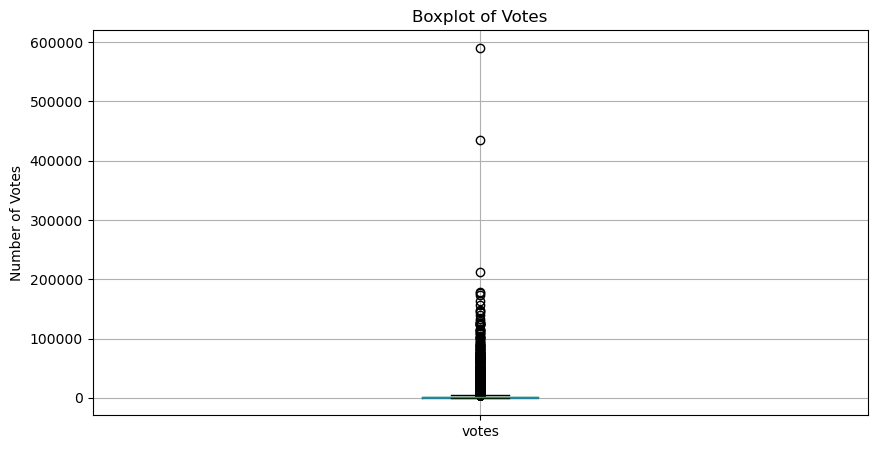

In [23]:
# Ploting 'Votes' variable outliers
merged_data[['votes']].boxplot(figsize=[10,5])
plt.title('Boxplot of Votes')
plt.ylabel('Number of Votes');

In [24]:
# Finding the outliers
outliers_primary_resultsdf = merged_data[merged_data['votes'] > 200000]
outliers_primary_resultsdf

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,PST045214,PST040210,PST120214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
fips,,,,,,,,,,,,,,,,,,,,,
6037.0,California,CA,Los Angeles,Democrat,Bernie Sanders,434656,0.420,10116705,9818664,3.0,...,21.6,30.2,153343705,198435837,119111840,12236,20238148,17659,4057.88,2419.6
6037.0,California,CA,Los Angeles,Democrat,Hillary Clinton,590502,0.570,10116705,9818664,3.0,...,21.6,30.2,153343705,198435837,119111840,12236,20238148,17659,4057.88,2419.6
42101.0,Pennsylvania,PA,Philadelphia,Democrat,Hillary Clinton,212785,0.626,1560297,1526006,2.2,...,7.8,31.8,18069415,11566105,11167787,7299,3051401,3973,134.10,11379.5


In [25]:
merged_data.drop(merged_data[merged_data['state'] == 'California'].index, inplace=True)

#### Result:

The analysis of outliers revealed instances in the 'votes' column exceeding 200,000 for the Democratic Party in California's Los Angeles County and Pennsylvania's Philadelphia County. Subsequently, the rows related to California were removed from the dataset to ensure data integrity and reliability.

### Other dataframe outliers:

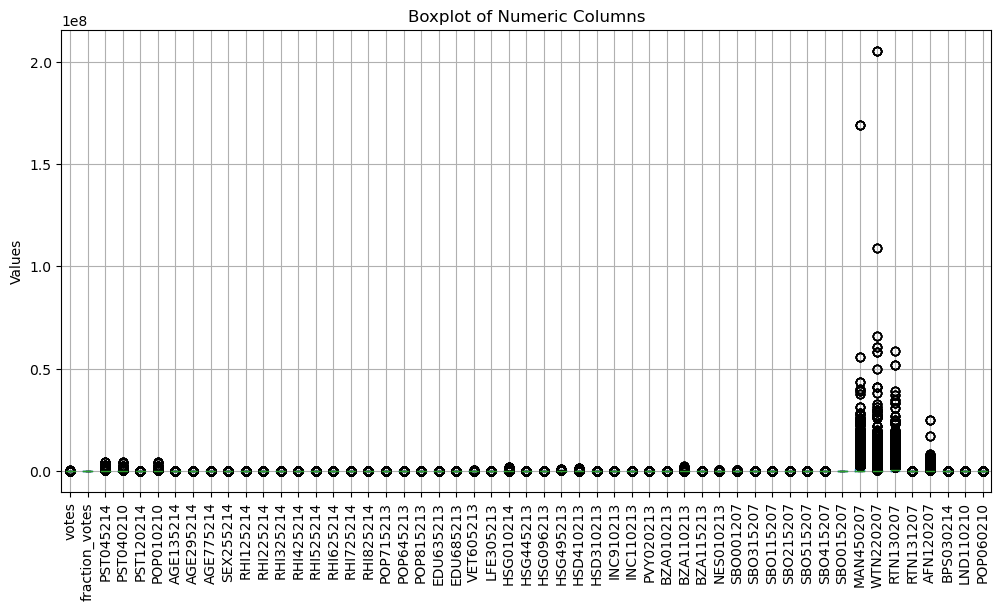

In [26]:
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64'])


plt.figure(figsize=(12, 6))
numeric_columns.boxplot(rot=90)
plt.title('Boxplot of Numeric Columns')
plt.ylabel('Values');

Three values seem to have outliers (MAN450207, WTN220207, and RTN130207):

In [27]:
# Finding the outliers of MAN450207,"Manufacturers shipments, 2007 ($1,000)"
outliers1 = merged_data[merged_data['MAN450207'] > 0.5 * 1e8]
# Print only unique outliers
outliers1.drop_duplicates(subset='county')

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,PST045214,PST040210,PST120214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
fips,,,,,,,,,,,,,,,,,,,,,
26163.0,Michigan,MI,Wayne,Democrat,Bernie Sanders,104999,0.384,1764804,1820641,-3.1,...,1.9,36.7,55896948,26102859,17275751,8720,3112369,1001,612.08,2974.4
48201.0,Texas,TX,Harris,Democrat,Bernie Sanders,63246,0.285,4441370,4093011,8.5,...,23.0,29.2,169275136,205478751,51899053,13276,7874724,40060,1703.48,2402.4


In [28]:
# Finding the outliers of WTN220207,"Merchant wholesaler sales, 2007 ($1,000)"
outliers2 = merged_data[merged_data['WTN220207'] > 0.5 *1e8]
# Print only unique outliers
outliers2.drop_duplicates(subset='county')

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,PST045214,PST040210,PST120214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
fips,,,,,,,,,,,,,,,,,,,,,
12086.0,Florida,FL,Miami-Dade,Democrat,Bernie Sanders,42009,0.243,2662874,2498017,6.6,...,60.5,28.9,9347116,60760055,34530470,14074,6005856,7731,1897.72,1315.5
34003.0,New Jersey,NJ,Bergen,Democrat,Bernie Sanders,34137,0.382,933572,905117,3.1,...,8.4,27.1,11973822,66117863,16474977,18602,1848306,3408,233.01,3884.5
36061.0,New York,NY,Manhattan,Democrat,Bernie Sanders,90227,0.337,1636268,1585873,3.2,...,10.5,30.6,8315093,108757422,38797518,23872,17182554,5380,22.83,69467.5
48113.0,Texas,TX,Dallas,Democrat,Bernie Sanders,44231,0.278,2518638,2367636,6.4,...,15.3,28.1,39047030,58165146,33177208,13929,5705137,14360,871.28,2718.0
48201.0,Texas,TX,Harris,Democrat,Bernie Sanders,63246,0.285,4441370,4093011,8.5,...,23.0,29.2,169275136,205478751,51899053,13276,7874724,40060,1703.48,2402.4


In [29]:
# Finding the outliers of RTN130207,"Retail sales, 2007 ($1,000)"
outliers3 = merged_data[merged_data['RTN130207'] > 0.5 *1e8]
# Print only unique outliers
outliers3.drop_duplicates(subset='county')

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,PST045214,PST040210,PST120214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
fips,,,,,,,,,,,,,,,,,,,,,
4013.0,Arizona,AZ,Maricopa,Democrat,Bernie Sanders,86942,0.398,4087191,3817357,7.1,...,9.2,27.3,40182099,49760315,58688328,15153,8408940,18597,9200.14,414.9
48201.0,Texas,TX,Harris,Democrat,Bernie Sanders,63246,0.285,4441370,4093011,8.5,...,23.0,29.2,169275136,205478751,51899053,13276,7874724,40060,1703.48,2402.4


The variables found to have outliers were excluded from further analysis and will be removed from the dataset. This decision was made to maintain the representativeness of the samples, as other more representative variables are available. For instance, since 'RTN131207' (Retail sales per capita, 2007) is considered a more indicative variable, 'RTN130207' will be dropped from the dataset for data simplification and clarity.

Droping all the irrelevant variables that are not used in the analysis:

In [30]:
merged_data.drop(columns=['PST040210', 'PST120214', 'POP010210', 'POP715213', 'POP645213', 'POP815213', 'VET605213', 'LFE305213', 'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213', 'INC110213', 'PVY020213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207', 'SBO315207', 'SBO115207', 'SBO215207', 'RTN130207',
'SBO515207', 'SBO515207', 'SBO015207', 'SBO415207', 'MAN450207', 'WTN220207', 'AFN120207', 'LND110210', 'POP060210'], inplace=True)

Checking the lost data

In [31]:
expected_states = ['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
                   'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
                   'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
                   'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                   'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                   'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota',
                   'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
                   'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
                   'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

existing_states_county_factsdf = merged_data['state'].unique()
missing_states = [state for state in expected_states if state not in existing_states_county_factsdf]

print("States missing in merged_data:", missing_states)

States missing in merged_data: ['California', 'Illinois', 'Kansas', 'Maine', 'Massachusetts', 'Minnesota', 'New Hampshire', 'North Dakota', 'Rhode Island', 'Vermont', 'Wyoming']


Although ten states are absent from the final merged dataframe, I will continue with the analysis as I need to delve deeper into understanding the factors influencing the vote counts for each party or candidate. Without additional information about those specific states, a comprehensive analysis may be challenging. Hence, proceeding with the available data is acceptable for the current investigation.

## 📌Part 3. Exploratory data analysis

## 3.1 Analysis of Trump Supporters

In this section, I delve into the characteristics of Trump's supporters. 
- Who constitutes the demographic makeup of Trump supporters? 
- What defining features distinguish them? 
- Are there any states or cities that exhibit a notable pro-Trump sentiment?

### 3.1.1. Overview

In [32]:
# Defining republican supporters
republican_supporters = merged_data[merged_data['party'] == 'Republican'].copy()

For illustration, I filtered the candidates from the Republican party along with their respective vote counts. This information will be utilized to create a bar chart, allowing for a visual representation of the vote share attributed to each candidate.

In [33]:
# Group by candidate and sum the votes
republican_candidates = republican_supporters.groupby('candidate')['votes'].sum().reset_index()

# Identify candidates with votes below 500,000
candidates_below_threshold = republican_candidates[republican_candidates['votes'] < 500000]

# Sum the votes of candidates below 500,000
other_votes_sum = candidates_below_threshold['votes'].sum()

# Create a mask for candidates to be replaced with 'other'
mask = republican_candidates['votes'] < 500000

# Replace candidates with 'other' in the 'candidate' column
republican_candidates.loc[mask, 'candidate'] = 'other'

# Group by candidate again to collapse the 'other' category
republican_candidates = republican_candidates.groupby('candidate')['votes'].sum().reset_index()

# Sort the DataFrame by votes in descending order
republican_candidates = republican_candidates.sort_values(by='votes', ascending=True)

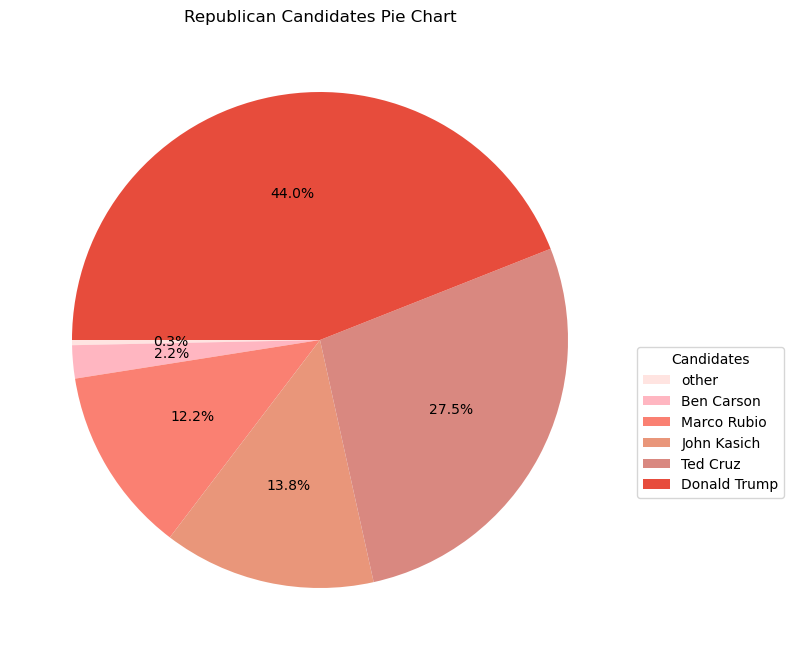

In [34]:
# Pie chart
plt.figure(figsize=(8, 10))
wedges, texts, autotexts = plt.pie(republican_candidates.votes, autopct='%1.1f%%', startangle=180, colors = ['#ffe4e1', '#ffb6c1', '#fa8072', '#e9967a', '#d98880', '#e74c3c'])
plt.legend(wedges, republican_candidates.candidate, title='Candidates', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title("Republican Candidates Pie Chart");

#### Result:
Donald Trump secured the highest overall vote share at 44%, establishing himself as the most popular figure within the Republican party. Following him are Ted Cruz with 27.5%, John Kasich with 13.8%, and Marco Rubio and Ben Carson with comparable percentages. 


In the subsequent sections, I will delve into the factors that contributed to Trump's popularity and explore the characteristics of Trump's supporters.

### 3.1.2. Defining dataframes

For further analysis, I will establish two new dataframes—one tailored for state-level examination and the other for county-level investigation. This will enable a more detailed and specific exploration of the data at both geographic levels.


##### Defining Trump Supporters Dataframes:

a) By state

In [35]:
# Group by 'state' and 'party' and sum the 'votes'
supporters_by_state_Trump = merged_data.groupby(['state', 'party','candidate']).agg({'votes': 'sum', 'fraction_votes': 'mean'}).reset_index()

# Sum the votes per state for both parties
state_totals_Trump = supporters_by_state_Trump.groupby('state')['votes'].sum().reset_index()
state_totals_Trump.columns = ['state', 'total_votes']

# Merge the state_totals DataFrame with the grouped_df
merged_supporters_by_state_Trump = pd.merge(supporters_by_state_Trump, state_totals_Trump, on='state')

# Calculate the proportion of votes for each party
merged_supporters_by_state_Trump['proportion_trump_by_state'] = (merged_supporters_by_state_Trump['votes'] / merged_supporters_by_state_Trump['total_votes'])

# Filter for Republicans
trump_df_by_state = merged_supporters_by_state_Trump[merged_supporters_by_state_Trump['candidate'] == 'Donald Trump']

# Display the result
trump_df_by_state.head()

,state,party,candidate,votes,fraction_votes,total_votes,proportion_trump_by_state
3,Alabama,Republican,Donald Trump,371735,0.486866,1223959,0.303715
9,Arizona,Republican,Donald Trump,249916,0.489067,834200,0.299588
15,Arkansas,Republican,Donald Trump,133144,0.374467,605971,0.219720
23,Delaware,Republican,Donald Trump,42472,0.624667,160416,0.264762
28,Florida,Republican,Donald Trump,1077221,0.492791,3940929,0.273342


a) By county

In [36]:
# Group by 'state', 'party', 'county', 'candidate' and sum the 'votes'
supporters_by_county_Trump = merged_data.groupby(['state', 'party', 'county', 'candidate']).agg({'votes': 'sum', 'fraction_votes': 'mean'}).reset_index()

# Sum the votes per county for both parties
county_totals_Trump = supporters_by_county_Trump.groupby('county')['votes'].sum().reset_index()
county_totals_Trump.columns = ['county', 'total_votes']

# Merge the county totals DataFrame with the grouped_df
merged_supporters_by_county_Trump = pd.merge(supporters_by_county_Trump, county_totals_Trump, on='county')

# Calculate the proportion of votes for each candidate and party
merged_supporters_by_county_Trump['proportion_trump_by_county'] = (merged_supporters_by_county_Trump['votes'] / merged_supporters_by_county_Trump['total_votes'])

# Filter for Trump
trump_df_by_county = merged_supporters_by_county_Trump[merged_supporters_by_county_Trump['candidate'] == 'Donald Trump']


# Sort in descending order
trump_df_by_county = trump_df_by_county.sort_values(by='proportion_trump_by_county', ascending=False)

trump_df_by_county.head()

,state,party,county,candidate,votes,fraction_votes,total_votes,proportion_trump_by_county
16174,Washington,Republican,Ferry,Donald Trump,949,0.816,1116,0.850358
16179,Washington,Republican,Grays Harbor,Donald Trump,4598,0.852,5462,0.841816
16214,Washington,Republican,Pend Oreille,Donald Trump,1928,0.817,2308,0.835355
16264,Washington,Republican,Yakima,Donald Trump,14872,0.826,17817,0.834708
16244,Washington,Republican,Wahkiakum,Donald Trump,530,0.840,636,0.833333


### 3.1.3. Geographical Analysis

In this section, I delve into the geographic distribution of Trump supporters. I aim to identify states and cities where Trump garnered strong support.

Plotting the states based on the proportion of votes allocated to Trump provides a visual representation of the distribution of support for Trump across different regions. 

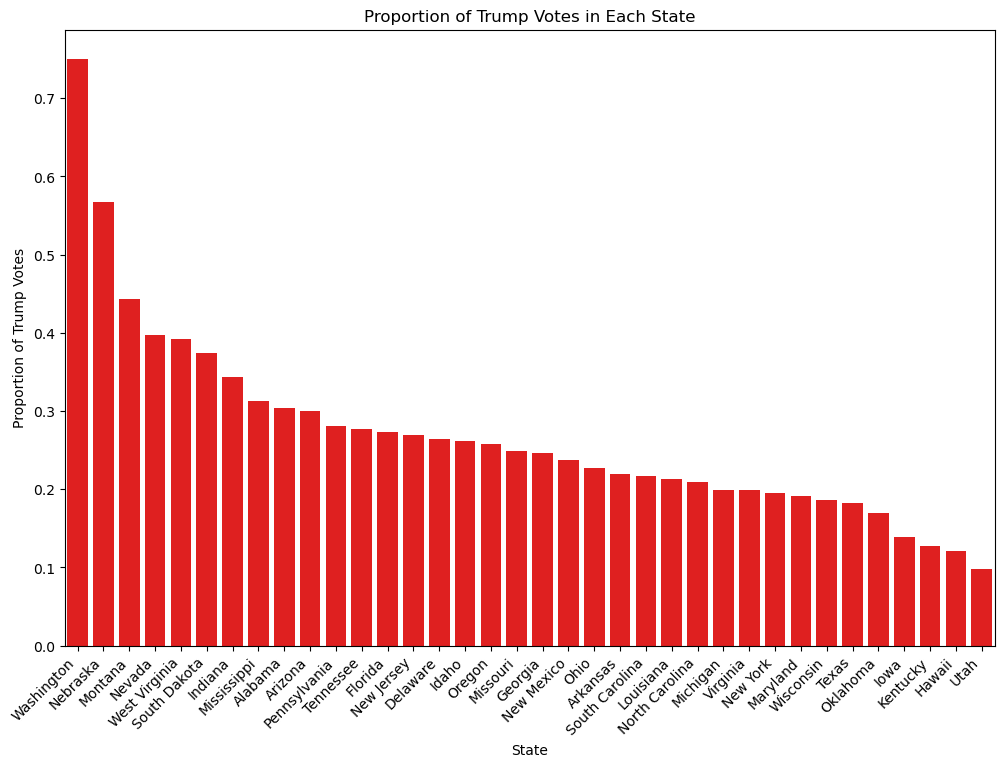

In [37]:
# Sort in descending order
trump_df_by_state = trump_df_by_state.sort_values(by='proportion_trump_by_state', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='state', y='proportion_trump_by_state', data=trump_df_by_state, color='red')
plt.title('Proportion of Trump Votes in Each State')
plt.xlabel('State')
plt.ylabel('Proportion of Trump Votes')
plt.xticks(rotation=45, ha='right');

#### Result:

In Washington, Trump enjoys the highest level of popularity, totaling in over 70% of the total votes cast for all candidates. Nebraska follows closely behind, with a proportion of around 57%, trailed by Montana, Nevada, and West Virginia. The majority of states exhibit a voting proportion ranging from 30% to 20%, tapering off to just above 10% in Kentucky, Hawaii, and Utah.

The list of counties where Trump gained the most popularity:

In [38]:
# Top 10 Trump supporter's counties
trump_df_by_county[['county','proportion_trump_by_county','state']].head(10)

,county,proportion_trump_by_county,state
16174,Ferry,0.850358,Washington
16179,Grays Harbor,0.841816,Washington
16214,Pend Oreille,0.835355,Washington
16264,Yakima,0.834708,Washington
16244,Wahkiakum,0.833333,Washington
16194,Kittitas,0.826399,Washington
16209,Pacific,0.825770,Washington
16239,Stevens,0.825472,Washington
16154,Asotin,0.822166,Washington
16204,Okanogan,0.821377,Washington


#### Result:

It is evident from the top 10 most supporting counties that they all belong to the state of Washington, showcasing a consistent trend of strong support for Trump within this particular state.

The map below illustrates the counties where Trump garnered the highest levels of support.

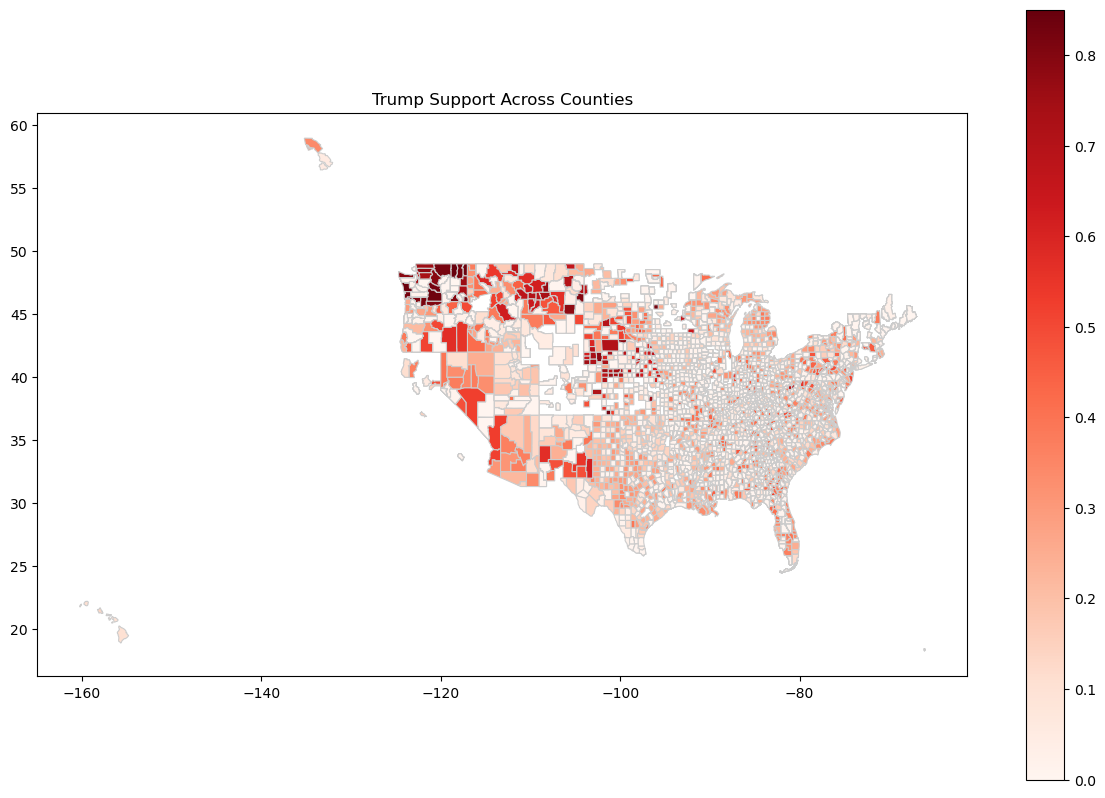

In [39]:
# Merge the map with Democratic support data
merged_map_trump = us_map.merge(trump_df_by_county, how='left', left_on='NAME', right_on='county')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_map_trump.plot(column='proportion_trump_by_county', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Trump Support Across Counties');

#### Result:

As depicted by the charts above, the darkest color, indicating the highest level of support, is predominantly observed in Washington state. Following closely are Nebraska, Montana, Nevada, and West Virginia.

Now, let's observe Trump's support fraction votes within his party.

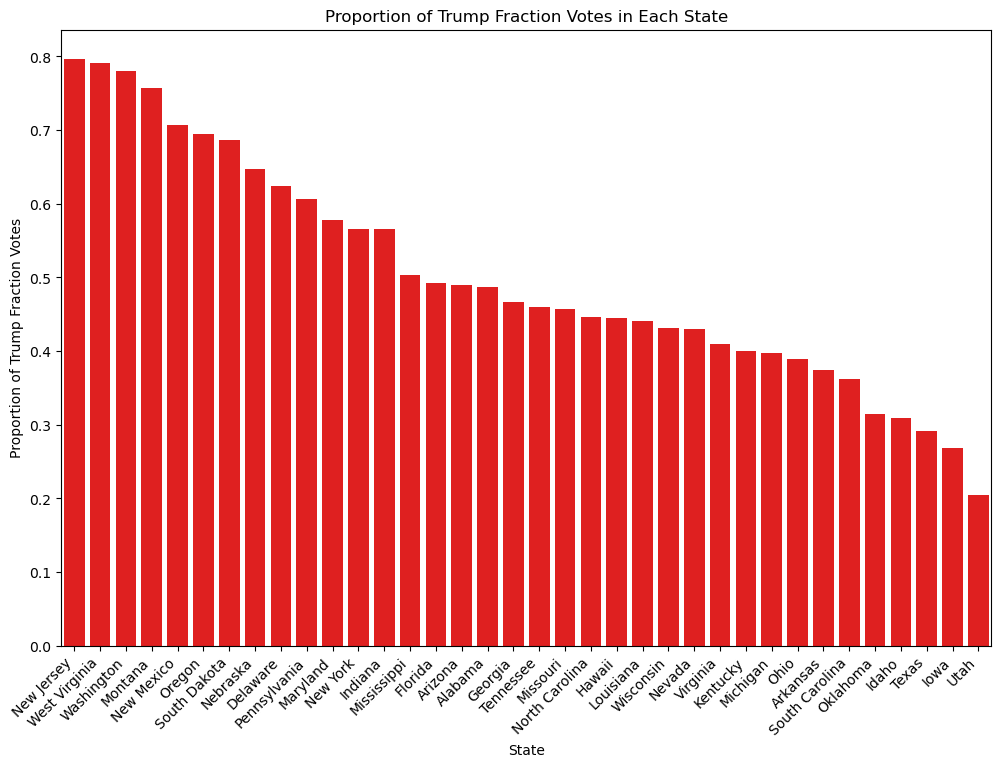

In [40]:
# Sort in descending order
trump_df_by_state = trump_df_by_state.sort_values(by='fraction_votes', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='state', y='fraction_votes', data=trump_df_by_state, color='red')
plt.title('Proportion of Trump Fraction Votes in Each State')
plt.xlabel('State')
plt.ylabel('Proportion of Trump Fraction Votes')
plt.xticks(rotation=45, ha='right');

#### Result:

Examining the share of votes Trump secures within his own Republican party, he notably dominates with an overwhelming fraction of nearly 80% in states such as New Jersey, West Virginia, and Washington. Slightly lower but still substantial proportions are observed in Montana, New Mexico, and Oregon. Conversely, the lowest fractions are once again found in Utah, alongside less significant scores in Iowa, Texas, and Idaho.

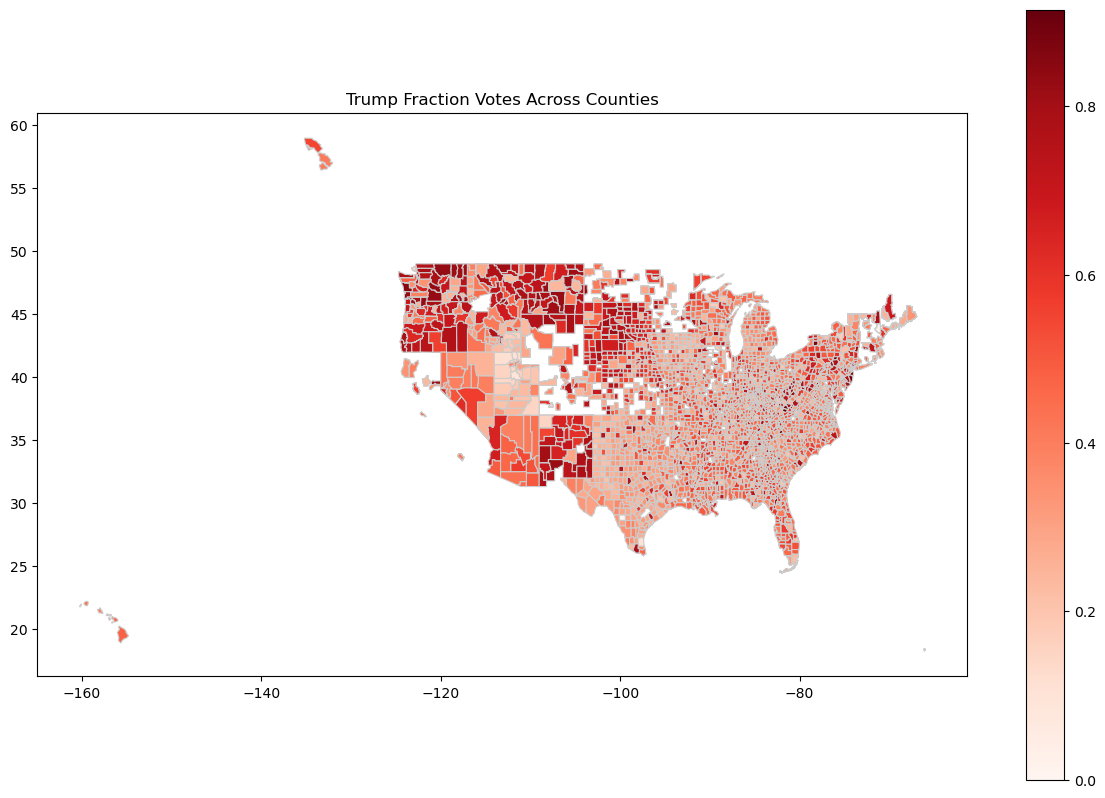

In [41]:
# Load a U.S. map shapefile
us_map = gpd.read_file('Dataset/county_shapefiles/cb_2014_us_county_20m.shp')

# Merge the map with Democratic support data
merged_map_trump = us_map.merge(trump_df_by_county, how='left', left_on='NAME', right_on='county')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_map_trump.plot(column='fraction_votes', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Trump Fraction Votes Across Counties');

#### Result:

The map aligns with the conclusion that Trump overwhelmingly dominates the share of votes within the Republican party, particularly with nearly 80% support in states like New Jersey, West Virginia, and Washington. The visual representation highlights lower but still substantial proportions in Montana, New Mexico, and Oregon.

### 3.1.4. Demographic Analysis

Analyzing the demographic features of Trump supporters, including age, gender, race, education level, and income, serves the purpose of identifying prevalent key characteristics among his supporters. This examination aims to uncover insights into the composition of Trump's support base and understand the demographic factors that played a significant role in shaping his voter profile.

#### 3.1.4.1. Age

In this section, the analysis begins with the merging of the previously created county-level data frame and the initial merged data frame.
Subsequently, a correlation matrix is constructed to explore potential correlations between different age groups and the votes received by Trump. 
Three variables are used to illustrate the age groups:
- AGE135214,"Persons under 5 years, percent, 2014"
- AGE295214,"Persons under 18 years, percent, 2014"
- AGE775214,"Persons 65 years and over, percent, 2014"

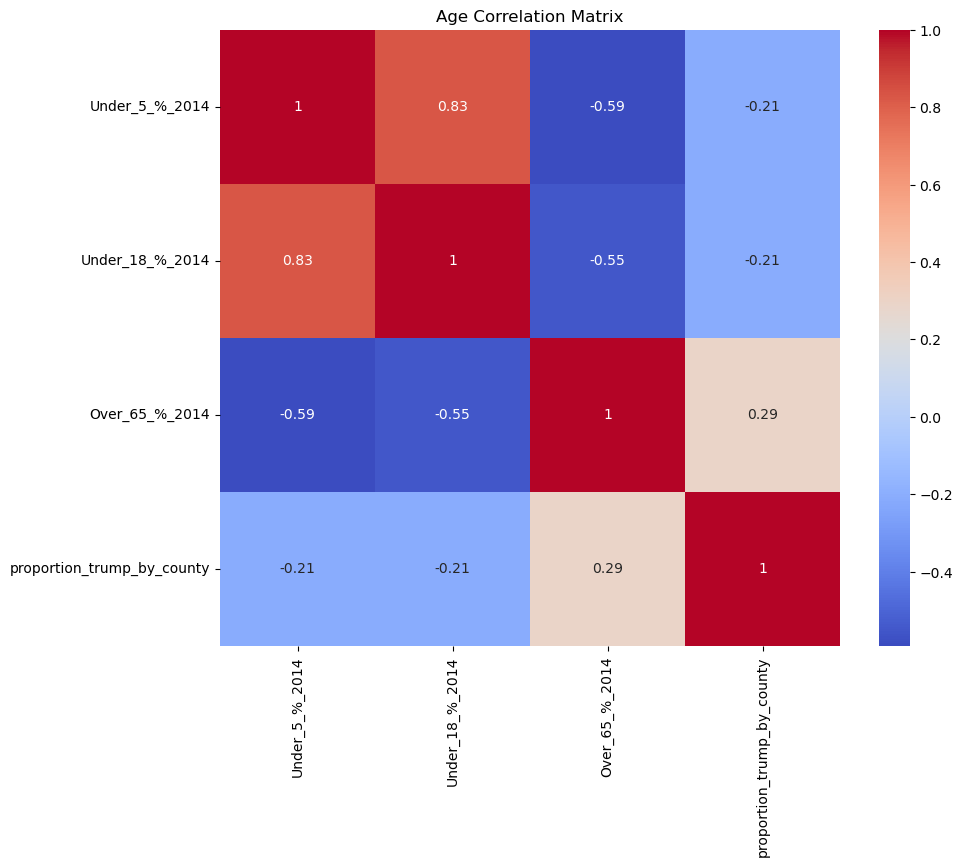

In [42]:
# Merging two dataset
merged_age_data = pd.merge(trump_df_by_county, merged_data[['state', 'county', 'AGE135214', 'AGE295214', 'AGE775214']], left_index=True, right_index=True)

# Renaming columns for better clarity
merged_age_data = merged_age_data.rename(columns={
    'AGE135214': 'Under_5_%_2014',
    'AGE295214': 'Under_18_%_2014',
    'AGE775214': 'Over_65_%_2014'
})

# Correlation Analysis
correlation_matrix = merged_age_data[['Under_5_%_2014', 'Under_18_%_2014', 'Over_65_%_2014', 'proportion_trump_by_county']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Age Correlation Matrix');

#### Result:

These coefficients suggest a negative correlation between the proportion of votes for Trump and the percentage of persons under 5 years and under 18 years, while a positive correlation exists with the percentage of persons 65 years and over.

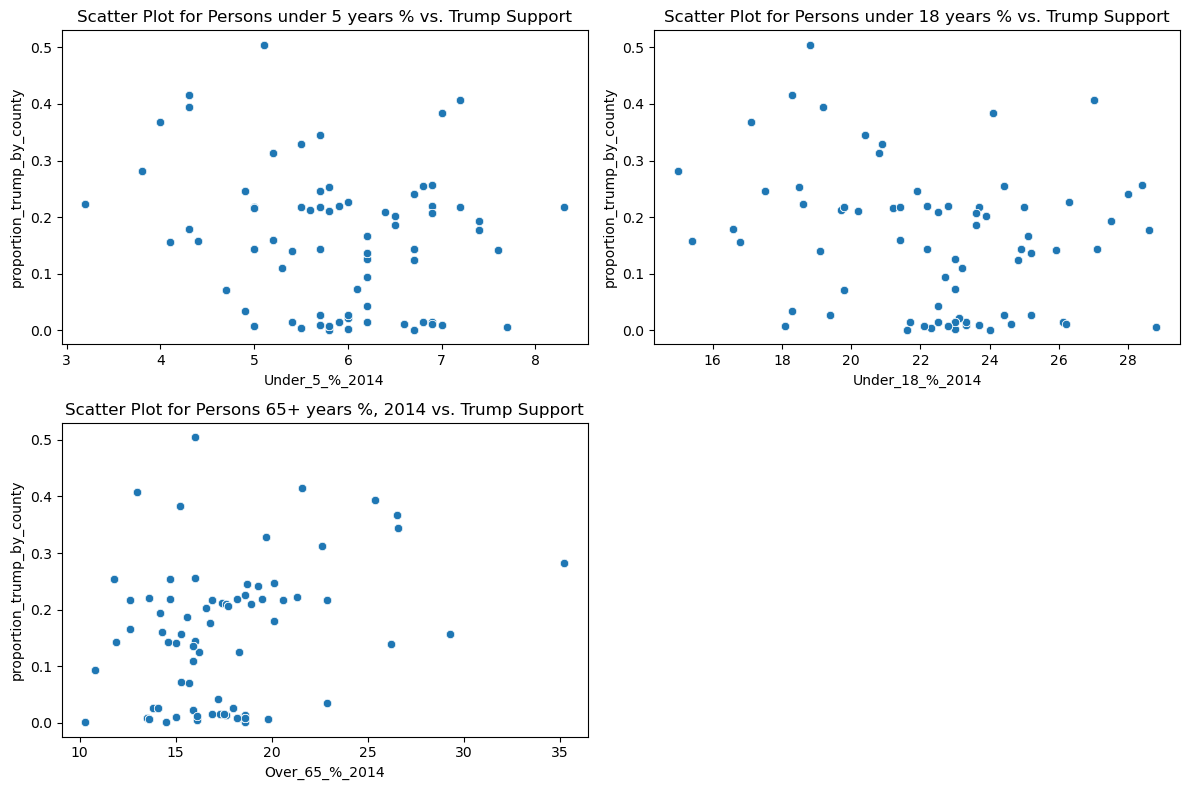

In [43]:
# Explore the relationship between Trump's vote share and age

# Scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot for AGE135214
plt.subplot(2, 2, 1)
sns.scatterplot(x='Under_5_%_2014', y='proportion_trump_by_county', data=merged_age_data)
plt.title('Scatter Plot for Persons under 5 years % vs. Trump Support')

# Scatter plot for AGE295214
plt.subplot(2, 2, 2)
sns.scatterplot(x='Under_18_%_2014', y='proportion_trump_by_county', data=merged_age_data)
plt.title('Scatter Plot for Persons under 18 years % vs. Trump Support')

# Scatter plot for AGE775214 - Persons 65 years and over, percent, 2014
plt.subplot(2, 2, 3)
sns.scatterplot(x='Over_65_%_2014', y='proportion_trump_by_county', data=merged_age_data)
plt.title('Scatter Plot for Persons 65+ years %, 2014 vs. Trump Support')

plt.tight_layout()

#### Result:

In the scatter plots for 'AGE135214' and 'AGE295214', there appears to be a general negative trend, indicating that counties with a higher percentage of young individuals tended to have lower support for Trump.
The scatter plot for 'AGE775214' shows a positive trend, suggesting that counties with a higher percentage of individuals aged 65 and over tended to have higher support for Trump.

#### Summary:

The analysis suggests that the age composition of counties is associated with the proportion of votes for Trump, with varying degrees of correlation depending on the specific age group. Counties with a higher percentage of elderly individuals tended to exhibit higher support for Trump, while those with a higher percentage of young individuals showed lower support.

#### 3.1.4.2. Gender

In this section, I perform an analysis of gender demographics to discern potential correlations with the proportion of votes for Trump across various counties, focusing on the "Female persons, percent, 2014" variable (SEX255214).

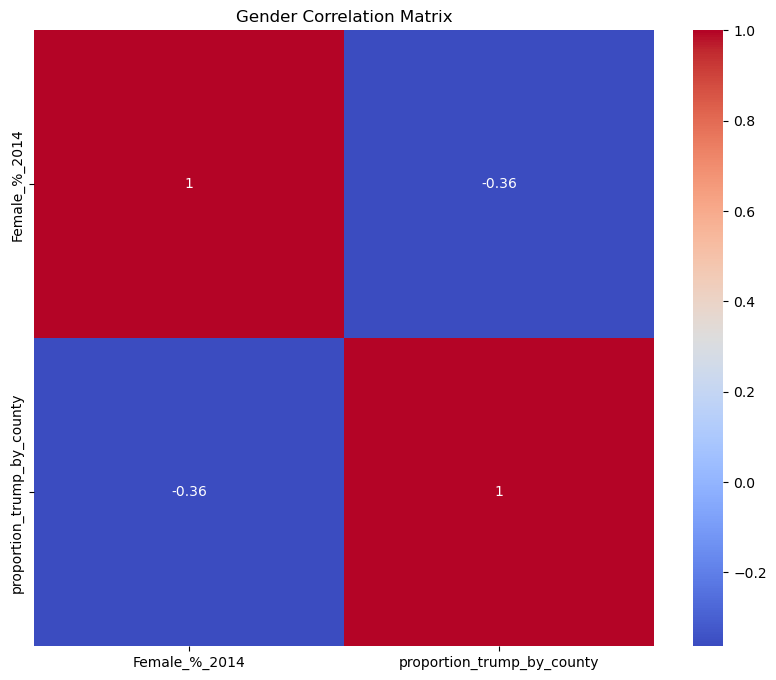

In [44]:
# Merging two datasets
merged_gender_data = pd.merge(trump_df_by_county, merged_data[['state', 'county', 'fraction_votes', 'SEX255214']], left_index=True, right_index=True)

# Renaming columns for better clarity
merged_gender_data = merged_gender_data.rename(columns={
    'SEX255214': 'Female_%_2014'
})

# Correlation Analysis
correlation_matrix = merged_gender_data[['Female_%_2014', 'proportion_trump_by_county']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Gender Correlation Matrix');

#### Result:

A correlation coefficient of -0.36 suggests a moderate negative correlation between the percentage of female persons in each county ('SEX255214') and the proportion of votes for Trump ('proportion_trump_by_county'). This indicates that, on average, counties with a higher percentage of females tended to have lower support for Trump, and vice versa. 

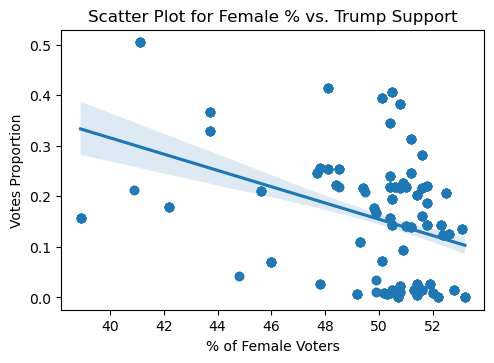

In [45]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.regplot(x='Female_%_2014', y='proportion_trump_by_county', data=merged_gender_data)
plt.title('Scatter Plot for Female % vs. Trump Support');
plt.xlabel("% of Female Voters")
plt.ylabel("Votes Proportion");

#### Result:

The downward-sloping regression line in the scatter plot reinforces the negative correlation observed in the correlation matrix. This indicates that as the percentage of female voters ('SEX255214') increases in a county, the proportion of votes for Trump tends to decrease. The regression line provides a clear trend, suggesting a systematic relationship between these two variables.

#### Summary:

The analysis of gender demographics reveals a moderate negative correlation (correlation coefficient: -0.36) between the percentage of female voters in each county and the proportion of votes for Trump. The downward-sloping regression line in the scatter plot further emphasizes that counties with a higher percentage of female voters tend to exhibit lower support for Trump, highlighting a noteworthy association between gender demographics and Trump's electoral outcomes.

#### 3.1.4.3. Education

In this chapter, I examine educational demographics based on variables: 'EDU635213,' reflecting the percentage of individuals aged 25 and older with a high school diploma or higher from 2009 to 2013, and 'EDU685213,' capturing the percentage of individuals aged 25 and older with a bachelor's degree or higher during the same period.

In [46]:
# Merge the Education data
merged_education_data = pd.merge(trump_df_by_county, merged_data[['state', 'county', 'fraction_votes', 'EDU635213', 'EDU685213']], left_index=True, right_index=True)

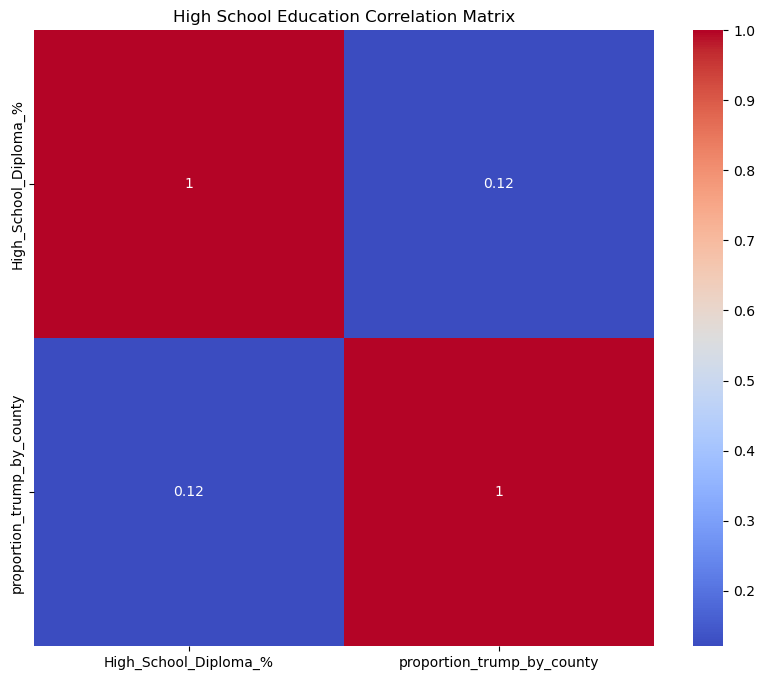

In [47]:
# Renaming the column for better clarity
merged_education_data = merged_education_data.rename(columns={
    'EDU635213': 'High_School_Diploma_%'})

# Correlation Analysis
correlation_matrix = merged_education_data[['High_School_Diploma_%', 'proportion_trump_by_county']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('High School Education Correlation Matrix');

#### Result:

A correlation coefficient of 0.12 between 'EDU635213' (percentage of individuals aged 25 and older with a high school diploma or higher) and 'proportion_trump_by_county' suggests a relatively weak positive correlation. This indicates that, on average, counties with a higher percentage of individuals with a high school diploma or higher tend to have a slightly higher proportion of votes for Trump.

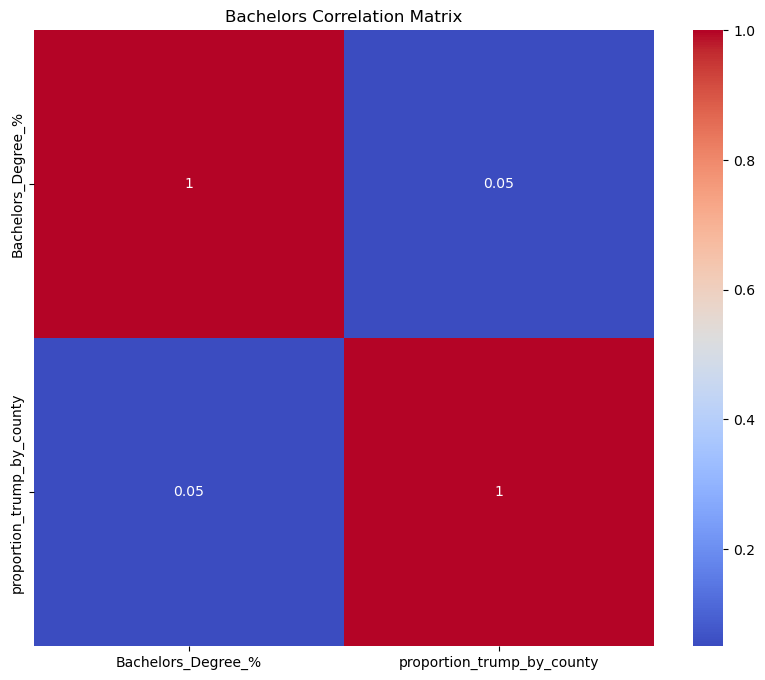

In [48]:
# Renaming the 'EDU685213' column for better clarity
merged_education_data = merged_education_data.rename(columns={
    'EDU685213': 'Bachelors_Degree_%'})

# Correlation Analysis
correlation_matrix = merged_education_data[['Bachelors_Degree_%', 'proportion_trump_by_county']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Bachelors Correlation Matrix');

#### Result:

A correlation coefficient of 0.05 between 'EDU685213' (percentage of individuals aged 25 and older with a bachelor's degree or higher) and 'proportion_trump_by_county' suggests a very weak positive correlation. This indicates that, on average, counties with a higher percentage of individuals with a bachelor's degree or higher may exhibit a slightly higher proportion of votes for Trump.

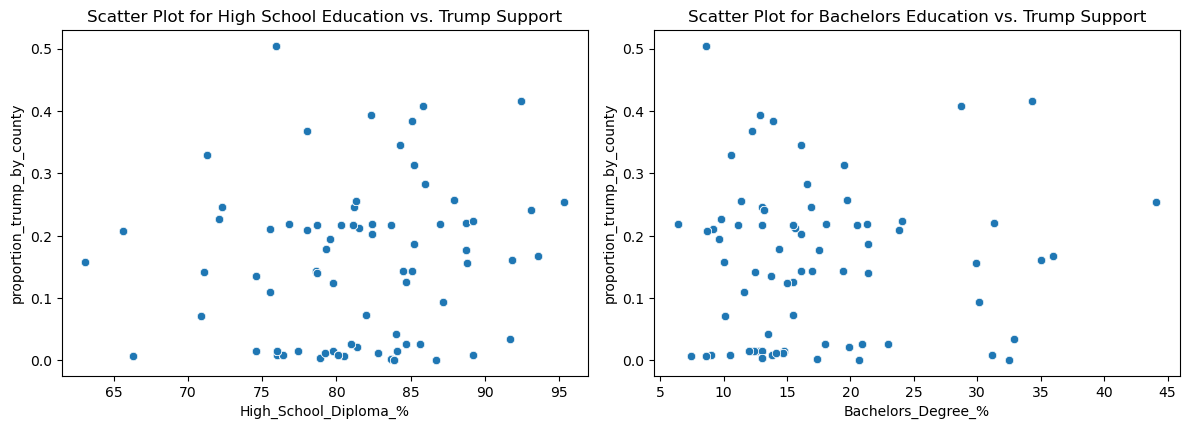

In [49]:
# Scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot for EDU635213 - High School Education
plt.subplot(2, 2, 1)
sns.scatterplot(x='High_School_Diploma_%', y='proportion_trump_by_county', data=merged_education_data)
plt.title('Scatter Plot for High School Education vs. Trump Support')

# Scatter plot for EDU685213 - Bachelors Education
plt.subplot(2, 2, 2)
sns.scatterplot(x='Bachelors_Degree_%', y='proportion_trump_by_county', data=merged_education_data)
plt.title('Scatter Plot for Bachelors Education vs. Trump Support')

plt.tight_layout()

#### Summary:

The education analysis indicates that, on average, counties with higher educational attainment tend to show only a slight increase in the proportion of votes for Trump, suggesting a weak relationship between education levels and Trump support.

### 3.1.5. Economic Factors Analysis

In this section, I analyze economic factors to uncover potential influences on Trump's support. I explore variables such as income, building permits, retail sales, and private nonfarm establishments across all counties.

#### 3.1.5.1. Income

This section explores the correlation between per capita income, represented by the variable 'INC910213' (average money income per person in the past 12 months, adjusted to 2013 dollars from 2009 to 2013), and the proportion of votes for Trump. 

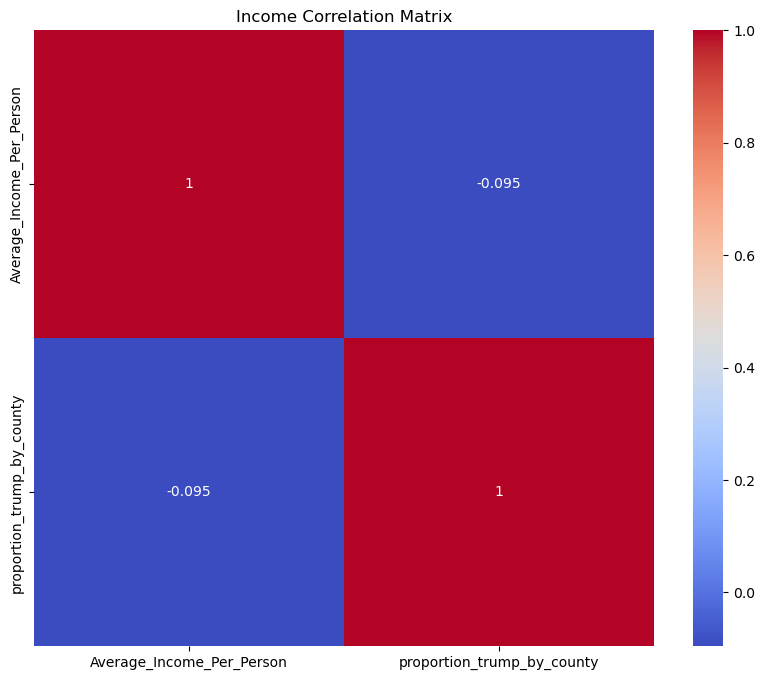

In [50]:
merged_income_data = pd.merge(trump_df_by_county, merged_data[['state', 'county', 'fraction_votes', 'INC910213']], left_index=True, right_index=True)

# Renaming the 'INC910213' column for better clarity
merged_income_data = merged_income_data.rename(columns={
    'INC910213': 'Average_Income_Per_Person'})

# Correlation Analysis
correlation_matrix = merged_income_data[['Average_Income_Per_Person', 'proportion_trump_by_county']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Income Correlation Matrix');

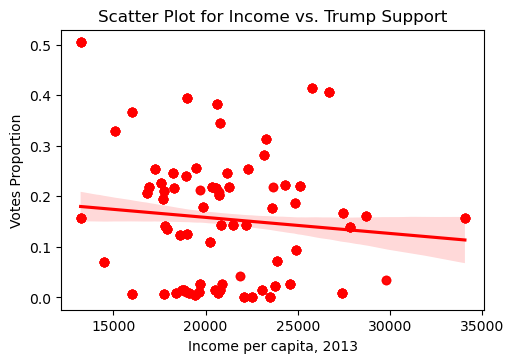

In [51]:
# Scatter plot for Income vs. Trump Support
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 2)
sns.regplot(x='Average_Income_Per_Person', y='proportion_trump_by_county', data=merged_income_data, color='red')
plt.title('Scatter Plot for Income vs. Trump Support')
plt.xlabel("Income per capita, 2013")
plt.ylabel("Votes Proportion");

#### Result:

With a correlation score of -0.095 and a downward-sloping trend observed in the regression plot, there appears to be a weak negative correlation between per capita income ('INC910213') and the proportion of votes for Trump. This suggests that, on average, counties with higher per capita income tend to exhibit slightly lower support for Trump. The modest correlation emphasizes the nuanced nature of the relationship between income levels and political preferences in the context of Trump's electoral support.

#### 3.1.5.2. Building permits

This section explores the significance of building permits, as indicated by the variable 'BPS030214' (Building permits in 2014), in understanding regional economic dynamics and their potential impact on Trump's electoral support.

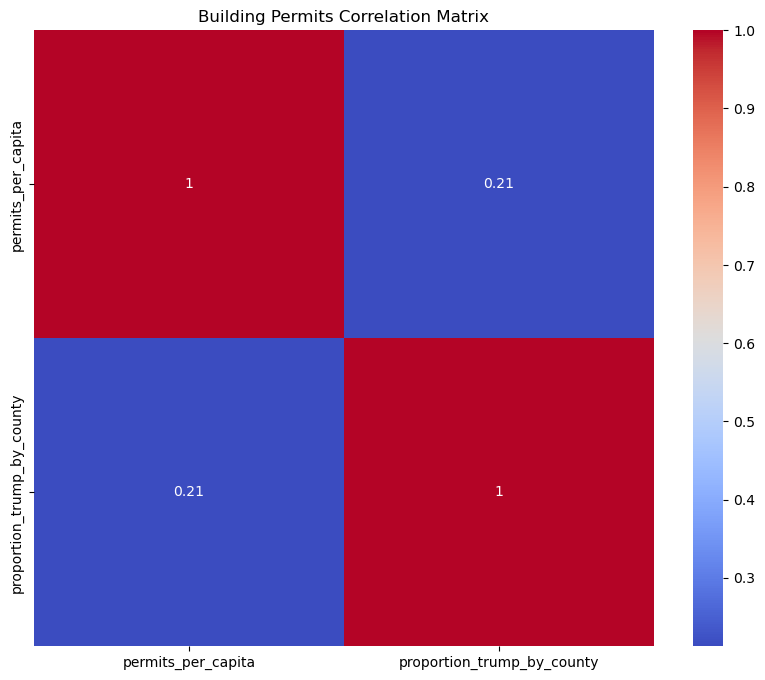

In [52]:
merged_permits_data = pd.merge(trump_df_by_county, merged_data[['state', 'county', 'fraction_votes', 'PST045214', 'BPS030214']], left_index=True, right_index=True)

merged_permits_data['permits_per_capita'] = merged_permits_data['BPS030214'] / merged_permits_data['PST045214']

# Correlation Analysis
correlation_matrix = merged_permits_data[['permits_per_capita', 'proportion_trump_by_county']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Building Permits Correlation Matrix');

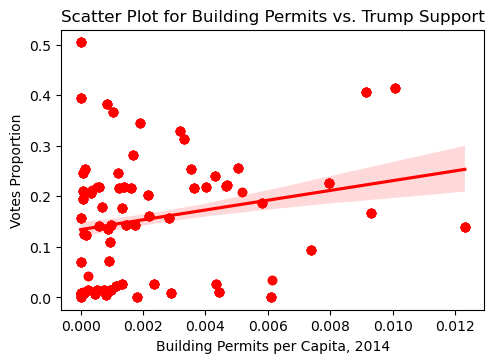

In [53]:
# Scatter plot for Building permits vs. Trump Support
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 2)
sns.regplot(x='permits_per_capita', y='proportion_trump_by_county', data=merged_permits_data, color='red')
plt.title('Scatter Plot for Building Permits vs. Trump Support')
plt.xlabel("Building Permits per Capita, 2014")
plt.ylabel("Votes Proportion");

#### Result:

A correlation coefficient of 0.21 indicates a weak positive correlation between building permits per capita and the proportion of votes for Trump. The upward-sloping scatterplot further suggests that, on average, counties with a higher number of building permits per capita tend to exhibit a slightly higher proportion of votes for Trump. The intensity on the left side, coupled with a few points upsurging to the right, suggests potential variability and outliers in the data.

#### 3.1.5.3. Retail sales

In this section, I explore the economic landscape through the lens of retail sales, represented by the variable 'RTN131207' (Retail sales per capita in 2007).

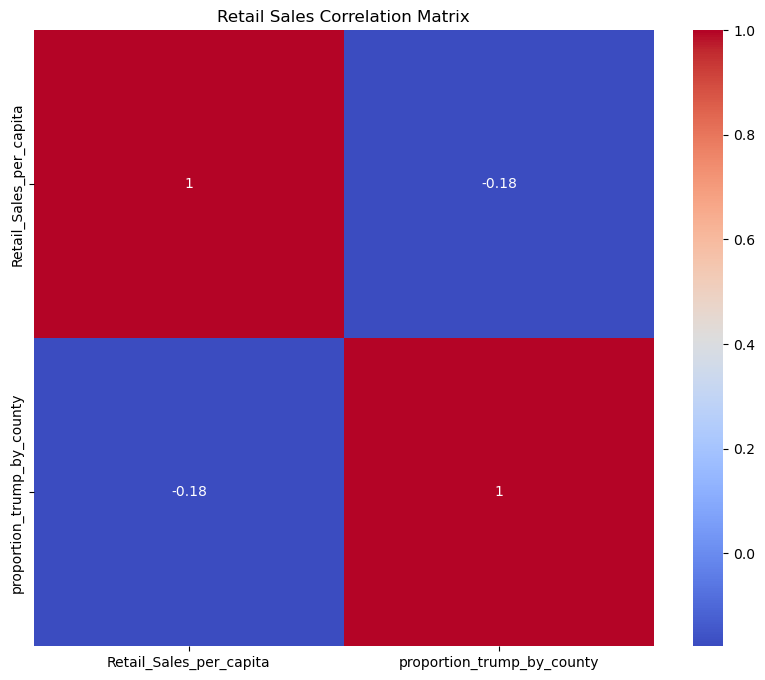

In [54]:
merged_retail_data = pd.merge(trump_df_by_county, merged_data[['state', 'county', 'fraction_votes', 'RTN131207']], left_index=True, right_index=True)

# Renaming the 'RTN131207' column for better clarity
merged_retail_data = merged_retail_data.rename(columns={
    'RTN131207': 'Retail_Sales_per_capita'})

# Correlation Analysis
correlation_matrix = merged_retail_data[['Retail_Sales_per_capita', 'proportion_trump_by_county']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Retail Sales Correlation Matrix');

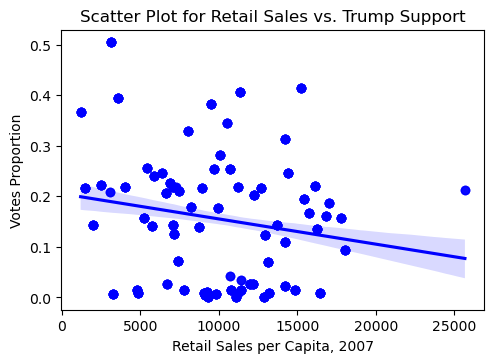

In [55]:
# Scatter plot for Retail Sales vs. Trump Support
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 2)
sns.regplot(x='Retail_Sales_per_capita', y='proportion_trump_by_county', data=merged_retail_data, color='blue')
plt.title('Scatter Plot for Retail Sales vs. Trump Support')
plt.xlabel("Retail Sales per Capita, 2007")
plt.ylabel("Votes Proportion");

#### Result:

Retail sales per capita ('RTN131207') demonstrates a weak negative correlation of -0.18 with the proportion of votes for Trump, as depicted by a downward-sloping scatter plot. This suggests that counties with higher retail sales per capita tend to exhibit slightly lower support for Trump.

#### 3.1.5.4. Private nonfarm establishments

In this section, I examine private nonfarm establishments, represented by the variable 'BZA010213' (Private nonfarm establishments in 2013).

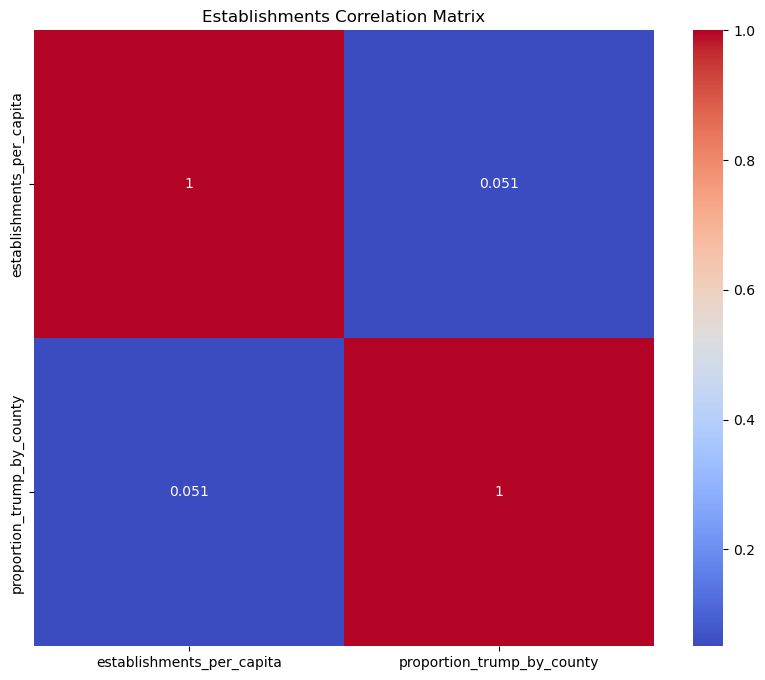

In [56]:
merged_establishments_data = pd.merge(trump_df_by_county, merged_data[['state', 'county', 'fraction_votes', 'PST045214', 'BZA010213']], left_index=True, right_index=True)

merged_establishments_data['establishments_per_capita'] = merged_establishments_data['BZA010213'] / merged_establishments_data['PST045214']

# Correlation Analysis
correlation_matrix = merged_establishments_data[['establishments_per_capita', 'proportion_trump_by_county']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Establishments Correlation Matrix');

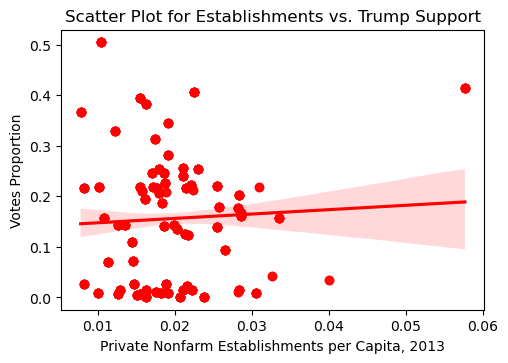

In [57]:
# Scatter plot for Establishments vs. Trump Support
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 2)
sns.regplot(x='establishments_per_capita', y='proportion_trump_by_county', data=merged_establishments_data, color='red')
plt.title('Scatter Plot for Establishments vs. Trump Support')
plt.xlabel("Private Nonfarm Establishments per Capita, 2013")
plt.ylabel("Votes Proportion");

#### Result:

The correlation coefficient of 0.051 indicates a very weak positive correlation between the number of private nonfarm establishments per capita and the proportion of votes for Trump. The scatter plot shows no clear trend, suggesting a minimal association between these factors in the analyzed counties.

### Summary:

In this chapter, an in-depth analysis of Trump supporters is conducted, covering demographic, geographic, and economic aspects. The investigation provides valuable insights into the characteristics of Trump's supporters and the factors influencing their preferences.

**Overview:**
   - Donald Trump secures the highest overall vote share at 44%, establishing himself as the most popular figure within the Republican party.
   - Trump receives significant support in Washington, Nebraska, Montana, Nevada, and West Virginia.
   - County-level analysis identifies Washington as a state with consistent strong support for Trump.

**Demographic Analysis:**
   - *Age:* Negative correlation is observed between the proportion of votes for Trump and the percentage of young individuals. Positive correlation exists with the percentage of individuals aged 65 and over.
   - *Gender:* A moderate negative correlation is found between the percentage of female persons in each county and the proportion of votes for Trump.
   - *Education:* Weak positive correlations are identified between Trump support and the percentage of individuals with a high school diploma or higher, as well as those with a bachelor's degree or higher.

**Economic Factors Analysis:**
   - *Income:* A weak negative correlation suggests that counties with higher per capita income tend to exhibit slightly lower support for Trump.
   - *Building Permits:* A weak positive correlation indicates that counties with a higher number of building permits per capita tend to exhibit slightly higher support for Trump.
   - *Retail Sales:* A weak negative correlation suggests that counties with higher retail sales per capita tend to exhibit slightly lower support for Trump.
   - *Private Nonfarm Establishments:* A very weak positive correlation suggests minimal association between the number of private nonfarm establishments per capita and Trump support.

## 3.2 Overview of Democrats' Performance

In this section, I give an overview of the Democrats' performance, specifically analyzing the candidates, the most supportive regions based on the map, and key factors that influenced their electoral outcomes.

In [58]:
# Defining Democratic supporters
democratic_supporters = merged_data[merged_data['party'] == 'Democrat'].copy()

Review the candidates

In [59]:
democratic_supporters['candidate'].unique()

array(['Bernie Sanders', 'Hillary Clinton', ' Uncommitted',
       "Martin O'Malley"], dtype=object)

The 'Uncommitted' variable will be dropped for illustrativeness

In [60]:
# Group by candidate and sum the votes
democratic_votes_by_candidate = democratic_supporters.groupby('candidate')['votes'].sum().reset_index()

# Drop 'Uncommitted' from the DataFrame
democratic_votes_by_candidate = democratic_votes_by_candidate[democratic_votes_by_candidate['candidate'] != ' Uncommitted']

# Sort the DataFrame by votes in ascending order
democratic_votes_by_candidate = democratic_votes_by_candidate.sort_values(by='votes', ascending=False)

# Display the DataFrame
democratic_votes_by_candidate

,candidate,votes
2,Hillary Clinton,11785627
1,Bernie Sanders,8378607
3,Martin O'Malley,752


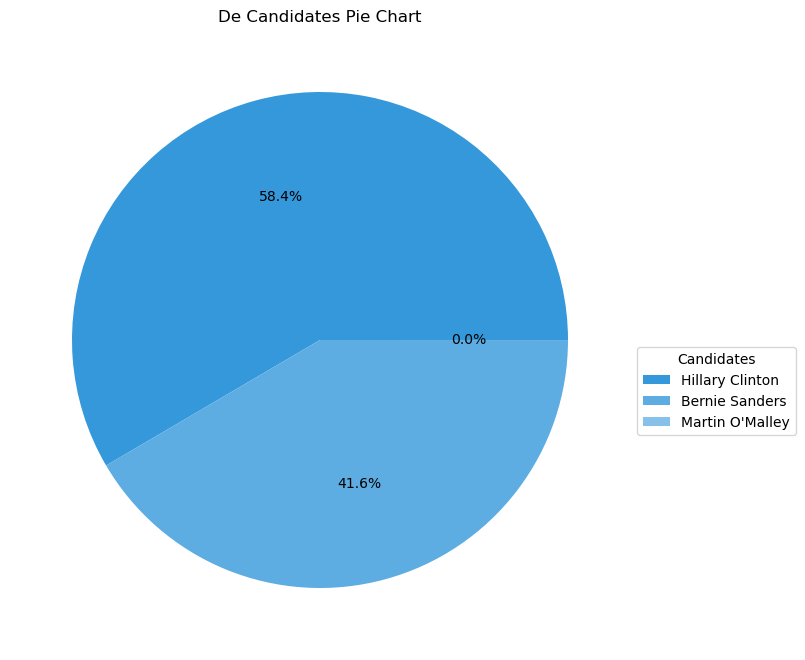

In [61]:
# Pie chart
plt.figure(figsize=(8, 10))
wedges, texts, autotexts = plt.pie(democratic_votes_by_candidate.votes, autopct='%1.1f%%', colors=['#3498db', '#5dade2', '#85c1e9', '#bbdefb', '#d6eaf8'])
plt.legend(wedges, democratic_votes_by_candidate.candidate, title='Candidates', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title("De Candidates Pie Chart");

### Summary:

The Democrats' performance overview reveals key candidates, with Hillary Clinton leading with over 58% of votes (11,785,627 votes), followed by Bernie Sanders with 41,6% (8,378,607 votes), and Martin O'Malley with a significantly lower count.

## 3.3 Analysis of Democrats🟦 and Rebublicans🟥 Supporters 


In this chapter, I delve into a comprehensive analysis of the supporters of both the Democratic and Republican parties. By examining key demographics, regional preferences, and voting trends, the aim is to uncover insights that shed light on the dynamics influencing the electoral landscape. This analysis will contribute to a deeper understanding of the factors that shaped the outcomes for each party, providing valuable context for the broader assessment of the election.

### 3.3.1 Creating new dataframes

Creating new dataframes to illustrate the proportion of votes based on state and county:

a) State

In [62]:
# Group by 'state' and 'party' and sum the 'votes'
supporters_by_state = merged_data.groupby(['state', 'party']).agg({'votes': 'sum'},).reset_index()

# Sum the votes per state for both parties
state_totals = supporters_by_state.groupby('state')['votes'].sum().reset_index()
state_totals.columns = ['state', 'total_votes']

# Merge the state_totals DataFrame with the grouped_df
merged_supporters_by_state = pd.merge(supporters_by_state, state_totals, on='state')

# Calculate the proportion of votes for each party
merged_supporters_by_state['proportion'] = merged_supporters_by_state['votes'] / merged_supporters_by_state['total_votes']

merged_supporters_by_state.head()

,state,party,votes,total_votes,proportion
0,Alabama,Democrat,386327,1223959,0.315637
1,Alabama,Republican,837632,1223959,0.684363
2,Arizona,Democrat,399097,834200,0.478419
3,Arizona,Republican,435103,834200,0.521581
4,Arkansas,Democrat,209448,605971,0.345640


b) County

In [63]:
# Group by 'state', 'county', and 'party' and sum the 'votes'
supporters_by_county = merged_data.groupby(['state', 'party', 'county']).agg({'votes': 'sum'},).reset_index()

# Sum the votes per state for both parties
county_totals = supporters_by_county.groupby('county')['votes'].sum().reset_index()
county_totals.columns = ['county', 'total_votes']

# Merge the state_totals DataFrame with the grouped_df
merged_supporters_by_county = pd.merge(supporters_by_county, county_totals, on='county')

# Calculate the proportion of votes for each party
merged_supporters_by_county['proportion'] = merged_supporters_by_county['votes'] / merged_supporters_by_county['total_votes']*100

merged_supporters_by_county.head()

,state,party,county,votes,total_votes,proportion
0,Alabama,Democrat,Autauga,2931,14770,19.844279
1,Alabama,Republican,Autauga,11839,14770,80.155721
2,Alabama,Democrat,Baldwin,7984,65324,12.222154
3,Alabama,Republican,Baldwin,49100,65324,75.163799
4,Georgia,Democrat,Baldwin,3796,65324,5.811034


Filtering the merged datasets to create separate DataFrames for Democratic and Republican votes, both at the state and county levels.

In [64]:
# State level
democratic_df_state = merged_supporters_by_state[merged_supporters_by_state['party'] == 'Democrat']
republican_df_state = merged_supporters_by_state[merged_supporters_by_state['party'] == 'Republican']

# County level
democratic_df_county = merged_supporters_by_county[merged_supporters_by_county['party'] == 'Democrat']
republican_df_county = merged_supporters_by_county[merged_supporters_by_county['party'] == 'Republican']

### 3.3.2 Geographical Analysis

In this chapter, I perform comprehensive analysis of the geographic distribution of Democratic support.

#### 3.3.2.1 States Popularity Analysis

Illustrating the proportion of votes for Democratic and Republican parties in each state.

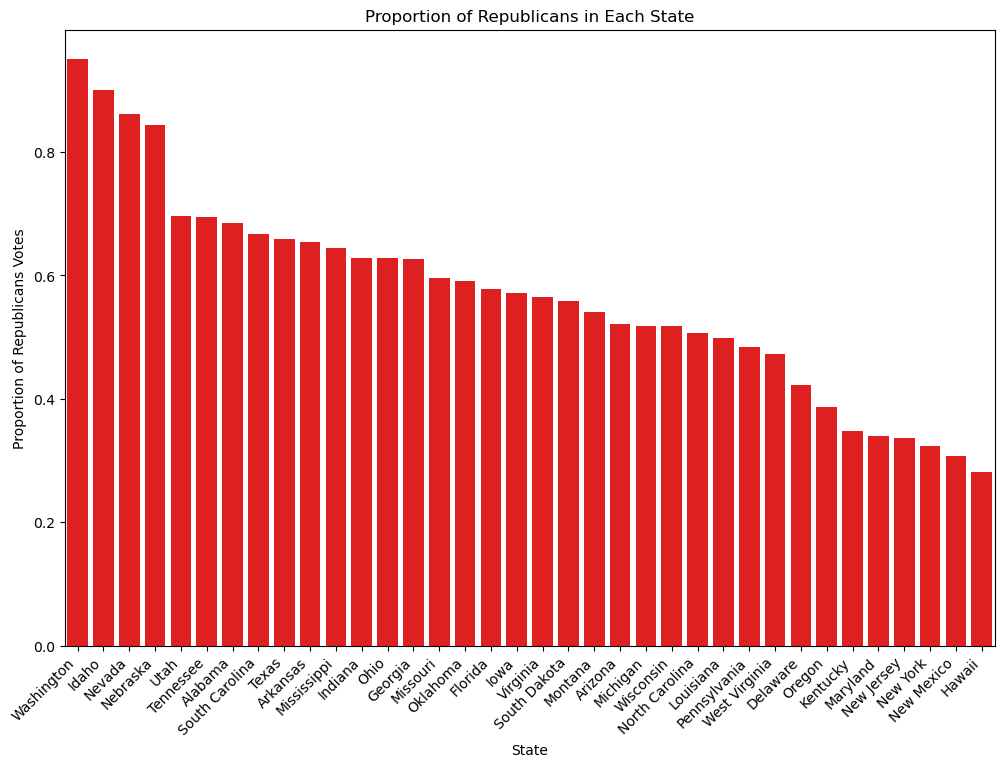

In [65]:
# Sort in descending order
republican_df_state = republican_df_state.sort_values(by='proportion', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='state', y='proportion', data=republican_df_state, color='red')
plt.title('Proportion of Republicans in Each State')
plt.xlabel('State')
plt.ylabel('Proportion of Republicans Votes')
plt.xticks(rotation=45, ha='right');

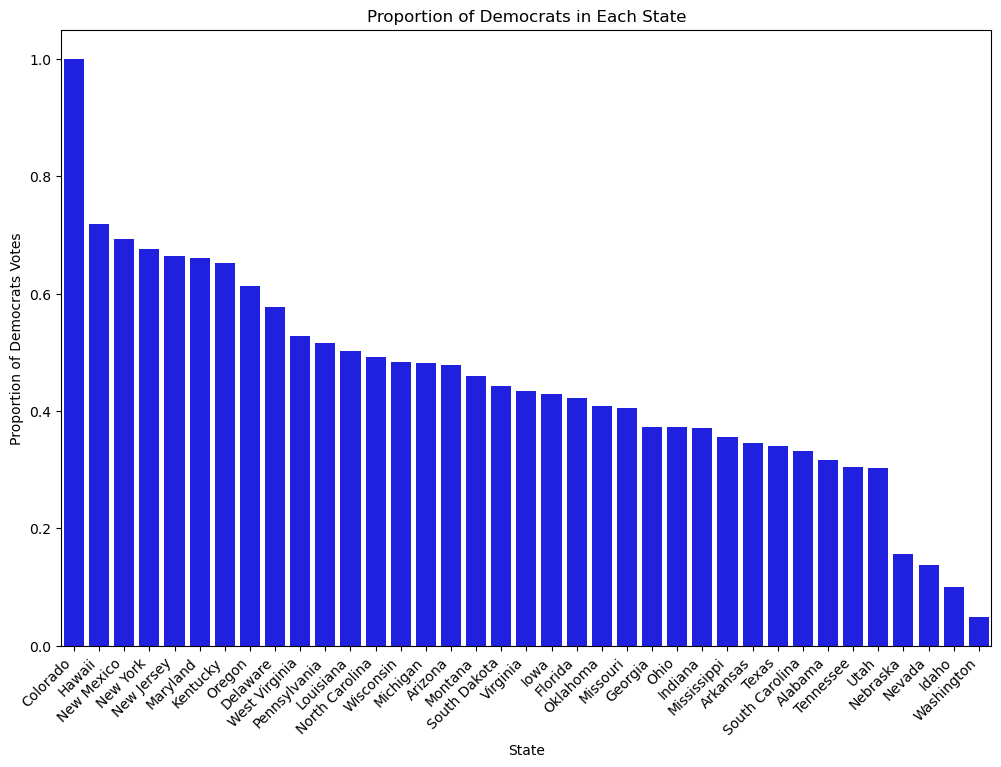

In [66]:
# Sort in descending order
democratic_df_state = democratic_df_state.sort_values(by='proportion', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='state', y='proportion', data=democratic_df_state, color='blue')
plt.title('Proportion of Democrats in Each State')
plt.xlabel('State')
plt.ylabel('Proportion of Democrats Votes')
plt.xticks(rotation=45, ha='right');

#### Results:

The analysis of the graph reveals that Republicans have the highest support in states such as Washington, Idaho, Nevada, Nebraska, and Utah. On the other hand, Democrats enjoy the highest support in Colorado, followed by Hawaii, New Mexico, New York, and New Jersey.

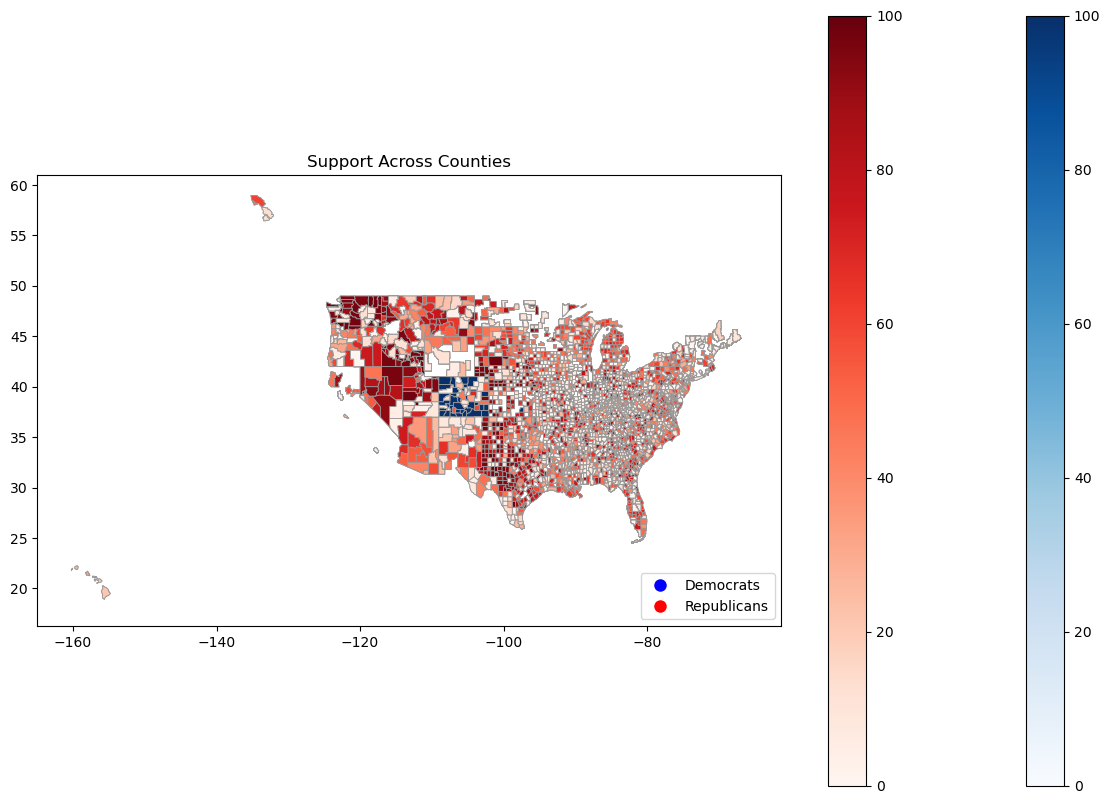

In [67]:
# Load a U.S. map shapefile
us_map = gpd.read_file('Dataset/county_shapefiles/cb_2014_us_county_20m.shp')

# Merge the map with Democratic and Republican support data
merged_map_democrat = us_map.merge(democratic_df_county, how='left', left_on='NAME', right_on='county')
merged_map_republican = us_map.merge(republican_df_county, how='left', left_on='NAME', right_on='county')

# Plot the choropleth maps
fig, ax = plt.subplots(figsize=(15, 10))

# Plot Democrats in blue
merged_map_democrat.plot(column='proportion', cmap='Blues', linewidth=0.6, ax=ax, edgecolor='0.6', legend=True, label='Democrats')

# Plot Republicans in red
merged_map_republican.plot(column='proportion', cmap='Reds', linewidth=0.6, ax=ax, edgecolor='0.6', legend=True, label='Republicans')

# Custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Democrats'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Republicans')]
ax.legend(handles=legend_elements, loc='lower right')

ax.set_title('Support Across Counties');

#### 3.3.2.2 Housing Analysis

In this section, I analyze housing units, focusing on the HSG010214 metric, which signifies the number of housing units in 2014. 

In [68]:
housing_data = pd.merge(merged_supporters_by_county, merged_data[['state', 'county', 'PST045214', 'HSG010214']], on=['state', 'county'], how='inner')
housing_data['housing_per_capita'] = housing_data['HSG010214'] / housing_data['PST045214']

I defined four clusters, ranging from "below 25%" to "above 75%," to categorize regions based on their housing characteristics.

In [69]:
# Define the bins for clustering
bins = [0, 0.25, 0.49, 0.74, 1]

# Define the labels for each cluster
labels = ['below 25%', 'between 25% and 50%', 'between 50% and 75%', 'above 75%']

# Add a new column 'housing_cluster' to the DataFrame based on the clustering
housing_data['housing_cluster'] = pd.cut(housing_data['housing_per_capita'], bins=bins, labels=labels, right=False)

After calculating the total votes in each cluster, I determined the proportion of votes for each party within each cluster. The results were visualized using a stacked bar plot, illustrating the distribution of party support across different housing clusters.

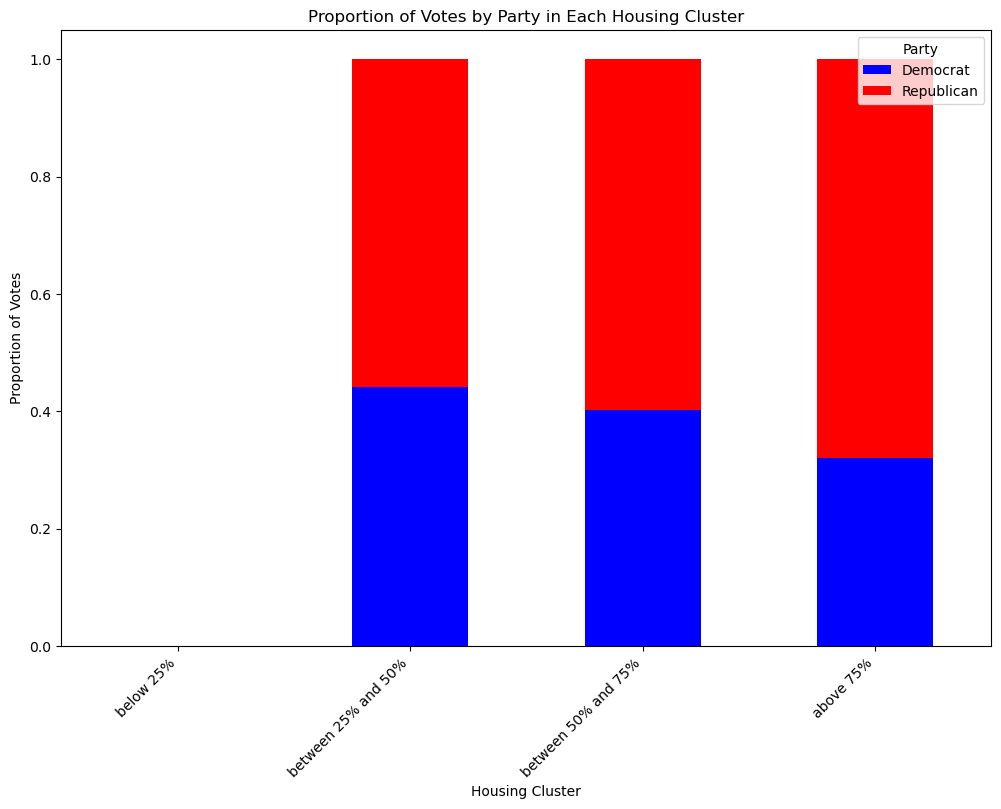

In [70]:
# Group the DataFrame by 'housing_cluster' and 'party', and aggregate the sum of votes
cluster_vote_counts = housing_data.groupby(['housing_cluster', 'party'])['votes'].sum().reset_index()

# Calculate the total votes in each cluster
cluster_total_votes = cluster_vote_counts.groupby('housing_cluster')['votes'].sum()

# Calculate the proportion of votes for each party in each cluster
cluster_vote_counts['proportion'] = cluster_vote_counts['votes'] / cluster_total_votes.loc[cluster_vote_counts['housing_cluster']].values

# Pivot the DataFrame for better visualization
cluster_proportions = cluster_vote_counts.pivot(index='housing_cluster', columns='party', values='proportion').reset_index()

# Plotting the bar plot
cluster_proportions.plot(x='housing_cluster', kind='bar', stacked=True, color=['blue', 'red'], figsize=(12, 8))
plt.title('Proportion of Votes by Party in Each Housing Cluster')
plt.xlabel('Housing Cluster')
plt.ylabel('Proportion of Votes')
plt.legend(title='Party', loc='upper right')
plt.xticks(rotation=45, ha='right');

ANOVA analysis

In [71]:
# Extract the proportions for each party in each cluster
proportions_democrat = cluster_proportions['Democrat']
proportions_republican = cluster_proportions['Republican']

proportions_democrat.dropna(inplace = True)
proportions_republican.dropna(inplace = True)

# Perform ANOVA
f_statistic, p_value = f_oneway(proportions_democrat, proportions_republican)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

F-statistic: 19.842144922540175
P-value: 0.011208143227859608
Reject the null hypothesis.


#### Conclusion:

The analysis of housing clusters and their impact on party support reveals distinct patterns in the distribution of Democratic and Republican votes. 
The proportion plot illustrates a gradual increase in Republican support as housing metrics advance, culminating in a significant dominance in the 'above 75%' cluster. 
The ANOVA results further confirm the statistical significance of these differences. 

### 3.3.3 Demographic Analysis

In this chapter, the focus is on conducting a detailed demographic analysis of Democratic supporters. The examination includes an exploration of age groups, gender distribution, racial composition, education levels, and income brackets among the identified Democratic supporters. 

#### 3.3.3.1. Age Analysis

In this section, I dig into the age demographics of Democratic supporters, examining key indicators such as the percentage of persons under 5 years, under 18 years, and 65 years and over in the year 2014.

Define the Dataframe

In [72]:
age_data = pd.merge(merged_supporters_by_county, merged_data[['state', 'county', 'AGE135214', 'AGE295214', 'AGE775214']], on=['state', 'county'], how='inner')

age_data = age_data.groupby(['county', 'party']).agg({
    'votes': 'sum',
    'total_votes' : 'first',
    'proportion': 'sum',
    'AGE135214': 'mean',
    'AGE295214': 'mean',
    'AGE775214': 'mean'}).reset_index()

age_data.head()

,county,party,votes,total_votes,proportion,AGE135214,AGE295214,AGE775214
0,Abbeville,Democrat,14504,5480,264.671533,5.4,21.5,19.4
1,Abbeville,Republican,29336,5480,535.328467,5.4,21.5,19.4
2,Acadia,Democrat,17694,6629,266.918087,7.1,26.7,13.5
3,Acadia,Republican,22080,6629,333.081913,7.1,26.7,13.5
4,Accomack,Democrat,17297,6750,256.251852,6.0,20.9,21.3


Correlation Analysis

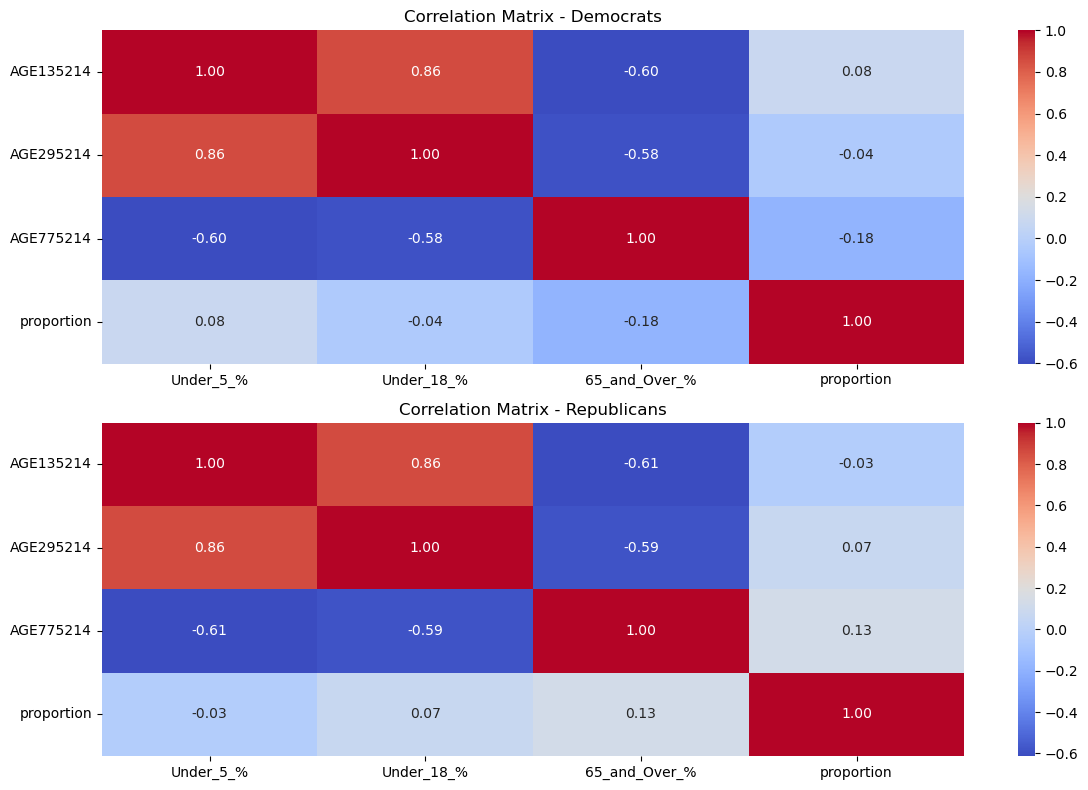

In [73]:
# Defining dataframes
correlation_democrats = age_data[age_data['party'] == 'Democrat'][['AGE135214', 'AGE295214', 'AGE775214', 'proportion']].corr()
correlation_republicans = age_data[age_data['party'] == 'Republican'][['AGE135214', 'AGE295214', 'AGE775214', 'proportion']].corr()

# Renaming the columns for better clarity
correlation_democrats = correlation_democrats.rename(columns={
    'AGE135214': 'Under_5_%',
    'AGE295214': 'Under_18_%',
    'AGE775214': '65_and_Over_%'
})

correlation_republicans = correlation_republicans.rename(columns={
    'AGE135214': 'Under_5_%',
    'AGE295214': 'Under_18_%',
    'AGE775214': '65_and_Over_%'
})

# Visualization - Correlation Matrix
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.heatmap(correlation_democrats, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Democrats')

plt.subplot(2, 1, 2)
sns.heatmap(correlation_republicans, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Republicans')

plt.tight_layout()

In light of the highest correlation score being associated with AGE775214 for both parties, I employ clustering techniques to categorize age-related demographic data.

In [74]:
# Define the bins for clustering
bins = [0, 10, 19, 29, 100]

# Define the labels for each cluster
labels = ['below 10%', 'between 10% and 20%', 'between 20% and 30%', 'above 30%']

# Add a new column 'age_65_over_cluster' to the DataFrame based on the clustering
age_data['age_65_over_cluster'] = pd.cut(age_data['AGE775214'], bins=bins, labels=labels, right=False)

# Display the first few rows of the DataFrame with the new clustering column
age_data.head()

,county,party,votes,total_votes,proportion,AGE135214,AGE295214,AGE775214,age_65_over_cluster
0,Abbeville,Democrat,14504,5480,264.671533,5.4,21.5,19.4,between 20% and 30%
1,Abbeville,Republican,29336,5480,535.328467,5.4,21.5,19.4,between 20% and 30%
2,Acadia,Democrat,17694,6629,266.918087,7.1,26.7,13.5,between 10% and 20%
3,Acadia,Republican,22080,6629,333.081913,7.1,26.7,13.5,between 10% and 20%
4,Accomack,Democrat,17297,6750,256.251852,6.0,20.9,21.3,between 20% and 30%


I visually represent the proportion of votes by party in various age clusters, concentrating on individuals aged 65 and over. 

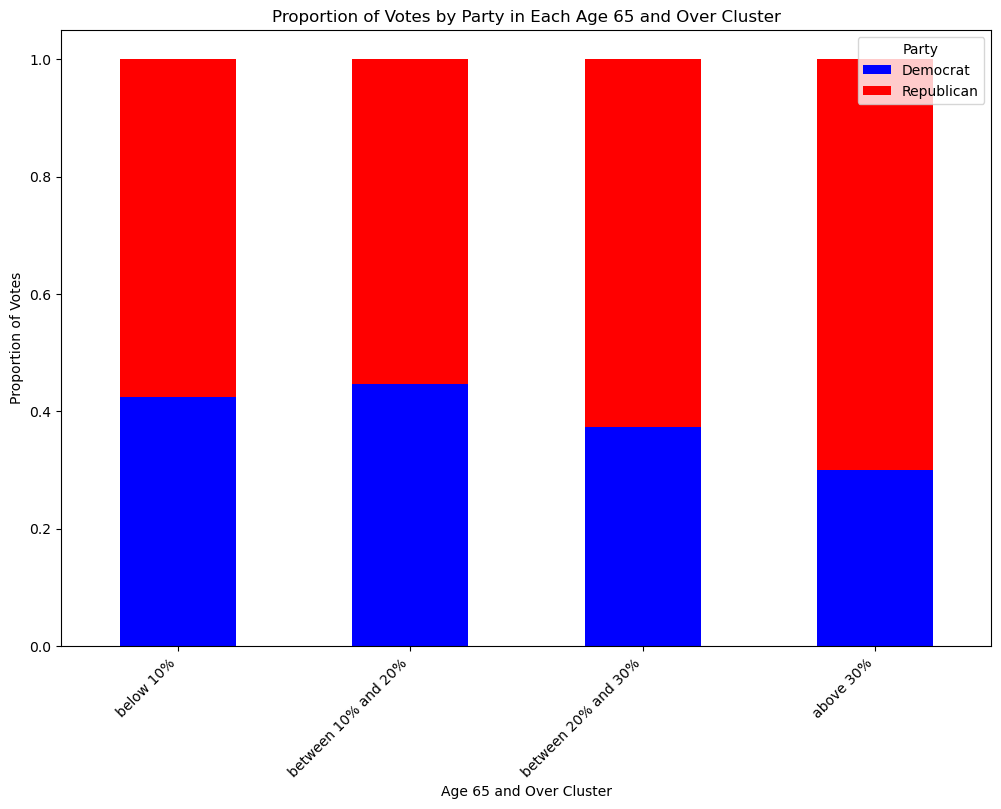

In [75]:
# Group the DataFrame
cluster_vote_counts = age_data.groupby(['age_65_over_cluster', 'party'])['votes'].sum().reset_index()

# Calculate the total votes in each cluster
cluster_total_votes = cluster_vote_counts.groupby('age_65_over_cluster')['votes'].sum()

# Calculate the proportion of votes for each party in each cluster
cluster_vote_counts['proportion'] = cluster_vote_counts['votes'] / cluster_total_votes.loc[cluster_vote_counts['age_65_over_cluster']].values

# Pivot the DataFrame for better visualization
cluster_proportions = cluster_vote_counts.pivot(index='age_65_over_cluster', columns='party', values='proportion').reset_index()

# Plotting the bar plot
cluster_proportions.plot(x='age_65_over_cluster', kind='bar', stacked=True, color=['blue', 'red'], figsize=(12, 8))
plt.title('Proportion of Votes by Party in Each Age 65 and Over Cluster')
plt.xlabel('Age 65 and Over Cluster')
plt.ylabel('Proportion of Votes')
plt.legend(title='Party', loc='upper right')
plt.xticks(rotation=45, ha='right');

ANOVA test

In [76]:
# Extract the proportions for each party in each cluster
proportions_democrat = cluster_proportions['Democrat']
proportions_republican = cluster_proportions['Republican']

proportions_democrat.dropna(inplace = True)
proportions_republican.dropna(inplace = True)

# Perform ANOVA
f_statistic, p_value = f_oneway(proportions_democrat, proportions_republican)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

F-statistic: 24.18613095432777
P-value: 0.0026623155515645936
Reject the null hypothesis.


#### Conclusion:

The visual analysis of voting proportions in different age clusters, particularly among individuals aged 65 and over, highlights a consistent trend of higher Republican support. As the cluster size increases, Republicans maintain a noticeable advantage in votes, indicating a robust Republican base within this demographic. The accompanying ANOVA results further reinforce these findings, demonstrating a statistically significant difference in voting proportions between Democrats and Republicans across age clusters.

#### 3.3.3.2. Gender Analysis

In this section, I explore the gender distribution among Democratic supporters by examining the percentage of female individuals within this demographic. 

Defining the dataframe

In [77]:
gender_data = pd.merge(merged_supporters_by_county, merged_data[['state', 'county', 'SEX255214']], on=['state', 'county'], how='inner')

gender_data = gender_data.groupby(['county', 'party']).agg({
    'votes': 'sum',
    'total_votes' : 'first',
    'proportion': 'sum',
    'SEX255214': 'first',}).reset_index()

gender_data.head()

,county,party,votes,total_votes,proportion,SEX255214
0,Abbeville,Democrat,14504,5480,264.671533,51.5
1,Abbeville,Republican,29336,5480,535.328467,51.5
2,Acadia,Democrat,17694,6629,266.918087,51.5
3,Acadia,Republican,22080,6629,333.081913,51.5
4,Accomack,Democrat,17297,6750,256.251852,51.3


Correlation analysis

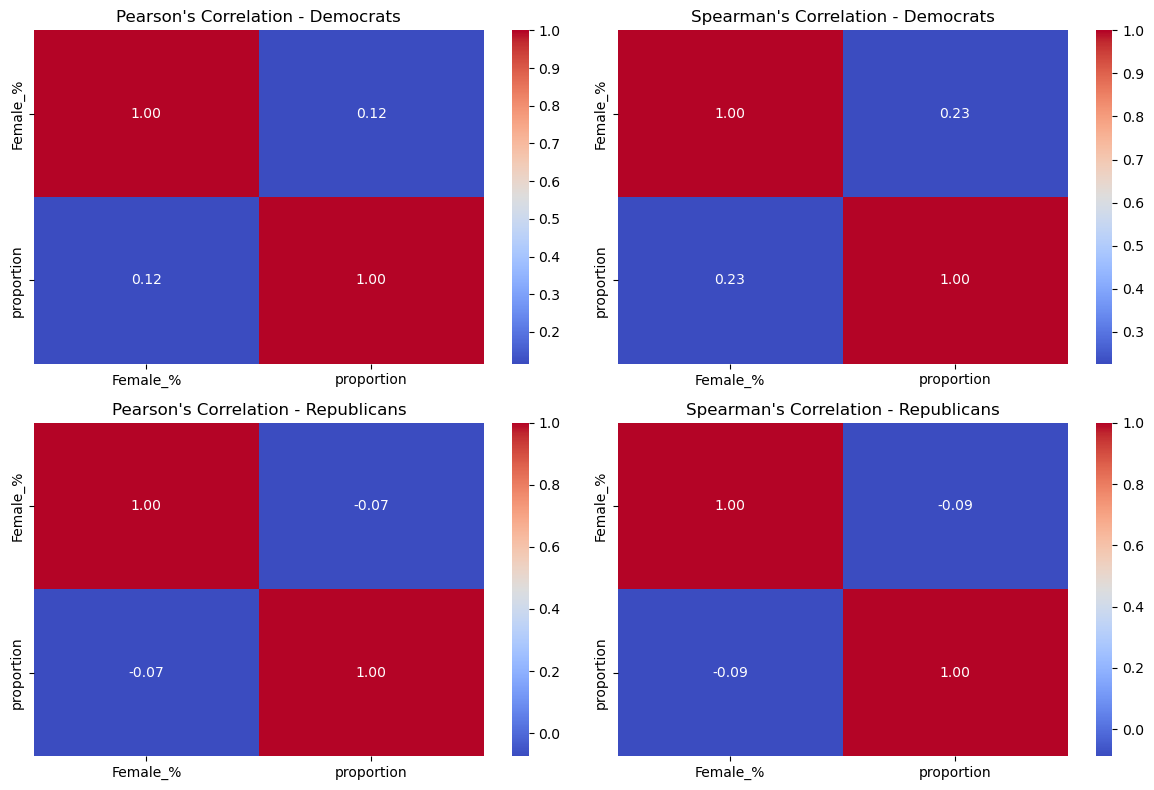

In [78]:
# Rename the column
gender_data.rename(columns={'SEX255214': 'Female_%'}, inplace=True)

# Calculate Pearson's correlation for Democrats
correlation_democrats_pearson = gender_data[gender_data['party']=='Democrat'][['Female_%', 'proportion']].corr(method='pearson')

# Calculate Spearman's correlation for Democrats
correlation_democrats_spearman = gender_data[gender_data['party']=='Democrat'][['Female_%', 'proportion']].corr(method='spearman')

# Calculate Pearson's correlation for Republicans
correlation_republicans_pearson = gender_data[gender_data['party']=='Republican'][['Female_%', 'proportion']].corr(method='pearson')

# Calculate Spearman's correlation for Republicans
correlation_republicans_spearman = gender_data[gender_data['party']=='Republican'][['Female_%', 'proportion']].corr(method='spearman')

# Visualization - Correlation Matrix
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.heatmap(correlation_democrats_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson's Correlation - Democrats")

plt.subplot(2, 2, 2)
sns.heatmap(correlation_democrats_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman's Correlation - Democrats")

plt.subplot(2, 2, 3)
sns.heatmap(correlation_republicans_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson's Correlation - Republicans")

plt.subplot(2, 2, 4)
sns.heatmap(correlation_republicans_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman's Correlation - Republicans")

plt.tight_layout();

Define clusters

In [79]:
# Define the bins for clustering
bins = [0, 40, 44, 49, 100]

# Define the labels for each cluster
labels = ['below 40%', 'between 40% and 45%', 'between 45% and 50%', 'above 50%']

# Add a new column 'gender_cluster' to the DataFrame based on the clustering
gender_data['gender_cluster'] = pd.cut(gender_data['Female_%'], bins=bins, labels=labels, right=False)

# Display the first few rows of the DataFrame with the new clustering column
gender_data.head()

,county,party,votes,total_votes,proportion,Female_%,gender_cluster
0,Abbeville,Democrat,14504,5480,264.671533,51.5,above 50%
1,Abbeville,Republican,29336,5480,535.328467,51.5,above 50%
2,Acadia,Democrat,17694,6629,266.918087,51.5,above 50%
3,Acadia,Republican,22080,6629,333.081913,51.5,above 50%
4,Accomack,Democrat,17297,6750,256.251852,51.3,above 50%


Visualization

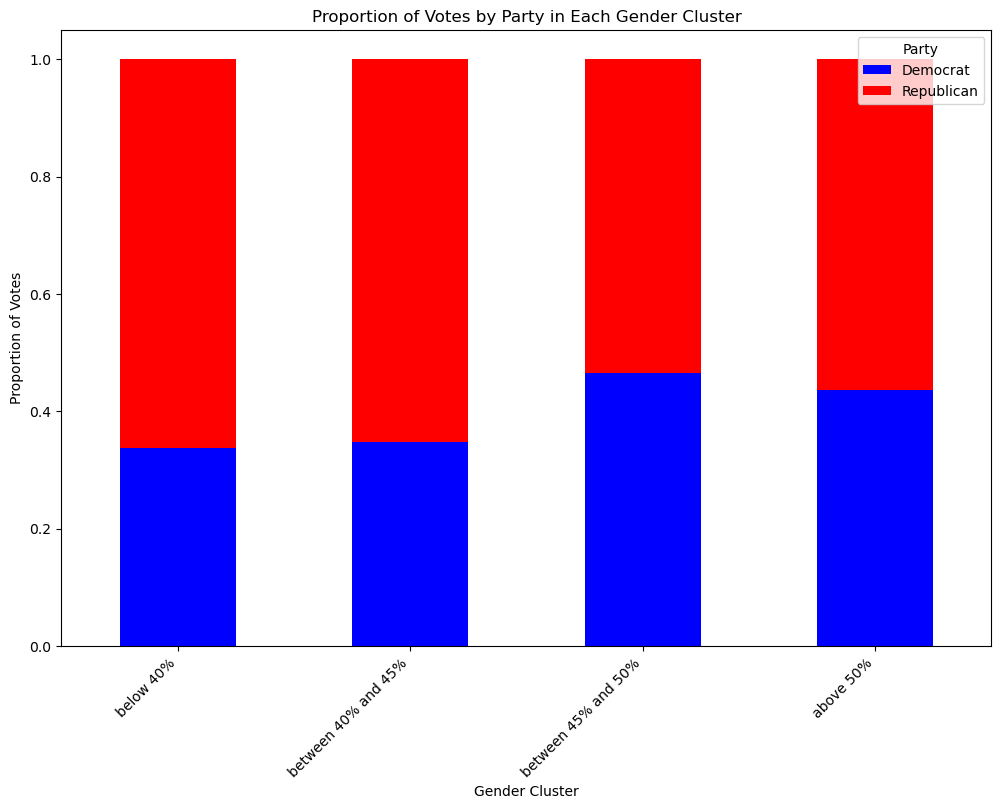

In [80]:
# Group the DataFrame
cluster_vote_counts = gender_data.groupby(['gender_cluster', 'party'])['votes'].sum().reset_index()

# Calculate the total votes in each cluster
cluster_total_votes = cluster_vote_counts.groupby('gender_cluster')['votes'].sum()

# Calculate the proportion of votes for each party in each cluster
cluster_vote_counts['proportion'] = cluster_vote_counts['votes'] / cluster_total_votes.loc[cluster_vote_counts['gender_cluster']].values

# Pivot the DataFrame for better visualization
cluster_proportions = cluster_vote_counts.pivot(index='gender_cluster', columns='party', values='proportion').reset_index()

# Plotting the bar plot
cluster_proportions.plot(x='gender_cluster', kind='bar', stacked=True, color=['blue', 'red'], figsize=(12, 8))
plt.title('Proportion of Votes by Party in Each Gender Cluster')
plt.xlabel('Gender Cluster')
plt.ylabel('Proportion of Votes')
plt.legend(title='Party', loc='upper right')
plt.xticks(rotation=45, ha='right');

In [81]:
# Extract the proportions for each party in each cluster
proportions_democrat = cluster_proportions['Democrat']
proportions_republican = cluster_proportions['Republican']

# Perform ANOVA
f_statistic, p_value = f_oneway(proportions_democrat, proportions_republican)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

F-statistic: 20.729395489356058
P-value: 0.0038796956840672758
Reject the null hypothesis.


#### Conclusion:

The analysis of the correlation between votes and the percentage of women indicates a subtle positive relationship, suggesting that states with higher female populations tend to lean more towards Democratic support. 

However, the weak correlations imply that gender distribution alone does not strongly predict voting patterns, likely influenced by other unexplored factors. It's worth noting that Spearman's correlation, which is less sensitive to outliers and does not assume a linear relationship, might provide additional insights, especially if the relationship between variables is not strictly linear, unlike Pearson's correlation.

Clustering the demographic data further illustrates variations in voting patterns among different gender clusters, with Democrats showing fluctuations in support. 

The ANOVA results confirm a statistically significant difference in voting proportions between Democrats and Republicans across gender clusters, supporting the notion of distinctive voting patterns within specific gender demographics. 

#### 3.3.3.3. Racial Analysis

In this section, I explore the racial distribution among Democratic supporters by examining various racial categories to gain insights into the diversity within the Democratic supporter demographic. The racial categories include White alone, Black or African American alone, American Indian and Alaska Native alone, Asian alone, Native Hawaiian and Other Pacific Islander alone, Two or More Races, Hispanic or Latino, and White alone (not Hispanic or Latino), each measured as a percentage in the year 2014.

Defining the dataframe

In [82]:
racial_data = pd.merge(merged_supporters_by_county, merged_data[['state', 'county',
                                                         'RHI125214',
                                                         'RHI225214',
                                                         'RHI325214',
                                                         'RHI425214',
                                                         'RHI525214',
                                                         'RHI625214',
                                                         'RHI725214',
                                                         'RHI825214']], 
                                                           on=['state', 'county'], how='inner')

racial_data = racial_data.groupby(['county', 'party']).agg({
    'votes': 'sum',
    'total_votes' : 'first',
    'proportion': 'sum',
    'RHI125214': 'first',
    'RHI225214': 'first',
    'RHI325214': 'first',
    'RHI425214': 'first',
    'RHI525214': 'first',
    'RHI625214': 'first',
    'RHI725214': 'first',
    'RHI825214': 'first'}).reset_index()

racial_data.head()

,county,party,votes,total_votes,proportion,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214
0,Abbeville,Democrat,14504,5480,264.671533,69.7,28.3,0.3,0.4,0.0,1.2,1.2,68.8
1,Abbeville,Republican,29336,5480,535.328467,69.7,28.3,0.3,0.4,0.0,1.2,1.2,68.8
2,Acadia,Democrat,17694,6629,266.918087,79.6,18.3,0.3,0.4,0.0,1.3,2.2,77.8
3,Acadia,Republican,22080,6629,333.081913,79.6,18.3,0.3,0.4,0.0,1.3,2.2,77.8
4,Accomack,Democrat,17297,6750,256.251852,68.8,28.1,0.7,0.7,0.2,1.6,8.9,61.1


Correlation analysis

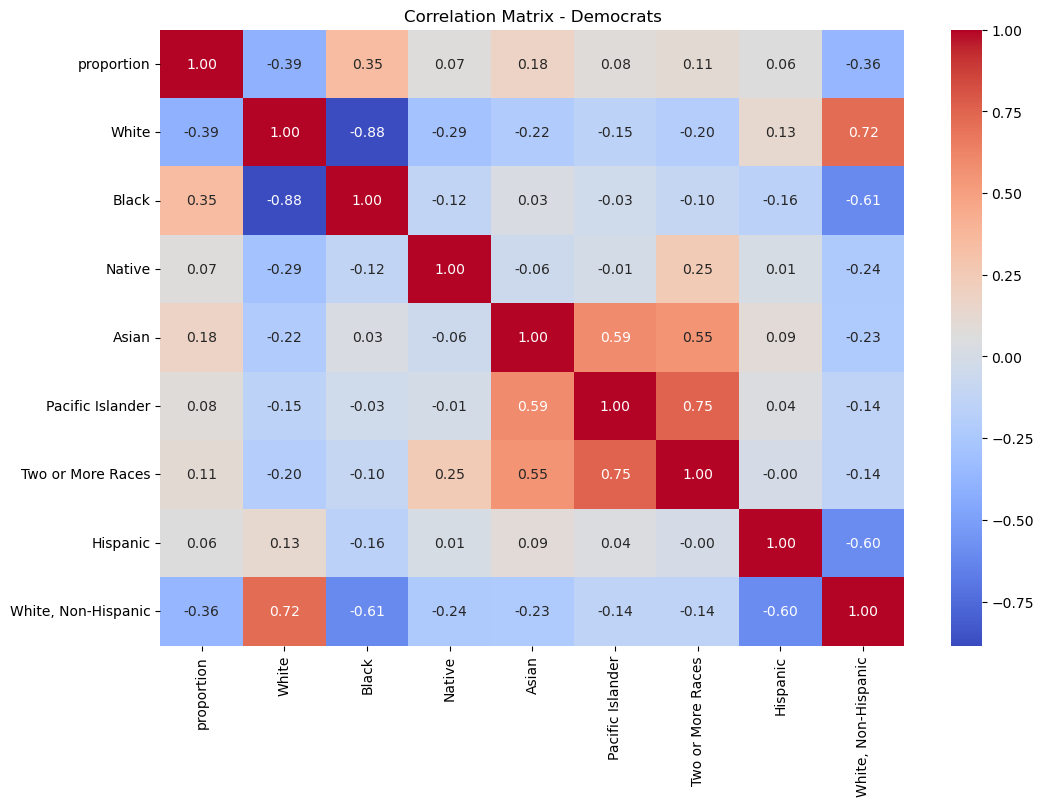

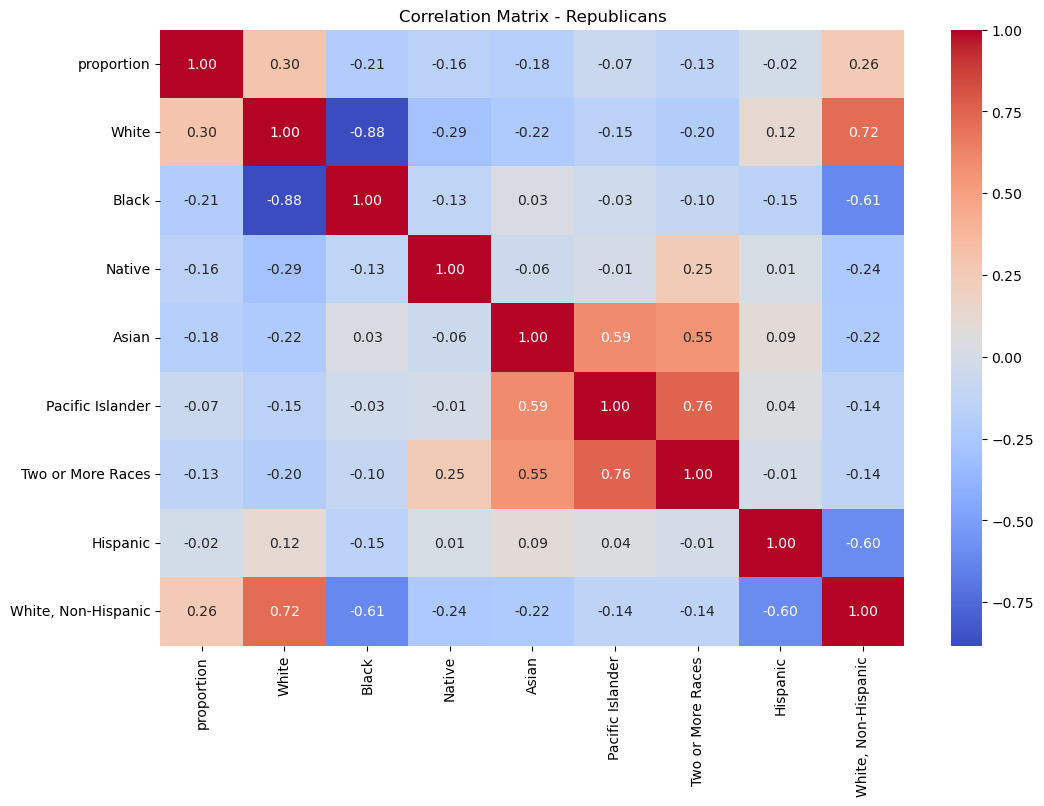

In [83]:
# Filter data for Democrats and Republicans
democratic_data = racial_data[racial_data['party'] == 'Democrat'].copy()
republican_data = racial_data[racial_data['party'] == 'Republican'].copy()

# Select relevant columns for correlation analysis
democratic_correlation_data = democratic_data[['proportion', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214']].copy()
republican_correlation_data = republican_data[['proportion', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214']].copy()

# Rename columns for Democrats
democratic_correlation_data.rename(columns={
    'RHI125214': 'White',
    'RHI225214': 'Black',
    'RHI325214': 'Native',
    'RHI425214': 'Asian',
    'RHI525214': 'Pacific Islander',
    'RHI625214': 'Two or More Races',
    'RHI725214': 'Hispanic',
    'RHI825214': 'White, Non-Hispanic'}, inplace=True)

# Correlation analysis for Democrats
democratic_correlation_matrix = democratic_correlation_data.corr()

# Visualization - Correlation Matrix for Democrats
plt.figure(figsize=(12, 8))
sns.heatmap(democratic_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Democrats')
plt.show()

# Rename columns for Republicans
republican_correlation_data.rename(columns={
    'RHI125214': 'White',
    'RHI225214': 'Black',
    'RHI325214': 'Native',
    'RHI425214': 'Asian',
    'RHI525214': 'Pacific Islander',
    'RHI625214': 'Two or More Races',
    'RHI725214': 'Hispanic',
    'RHI825214': 'White, Non-Hispanic'}, inplace=True)

# Correlation analysis for Republicans
republican_correlation_matrix = republican_correlation_data.corr()

# Visualization - Correlation Matrix for Republicans
plt.figure(figsize=(12, 8))
sns.heatmap(republican_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Republicans');

Based on correlation matrixes, the upcoming analysis will focus on further clustering of demographic data related to the percentages of White alone (RHI125214) and White alone, not Hispanic or Latino (RHI825214) within Democratic supporters. 

Defining bins

In [84]:
# Define the bins for clustering
bins = [0, 25, 49, 74, 100]

# Define the labels for each cluster
labels = ['below 25%', 'between 25% and 50%', 'between 50% and 75%', 'above 75%']

# Add a new columns to the DataFrame based on the clustering
racial_data['racial_cluster_White_alone'] = pd.cut(racial_data['RHI125214'], bins=bins, labels=labels, right=False)
racial_data['racial_cluster_White_alone_/H_L'] = pd.cut(racial_data['RHI825214'], bins=bins, labels=labels, right=False)

Racial Cluster - White Alone

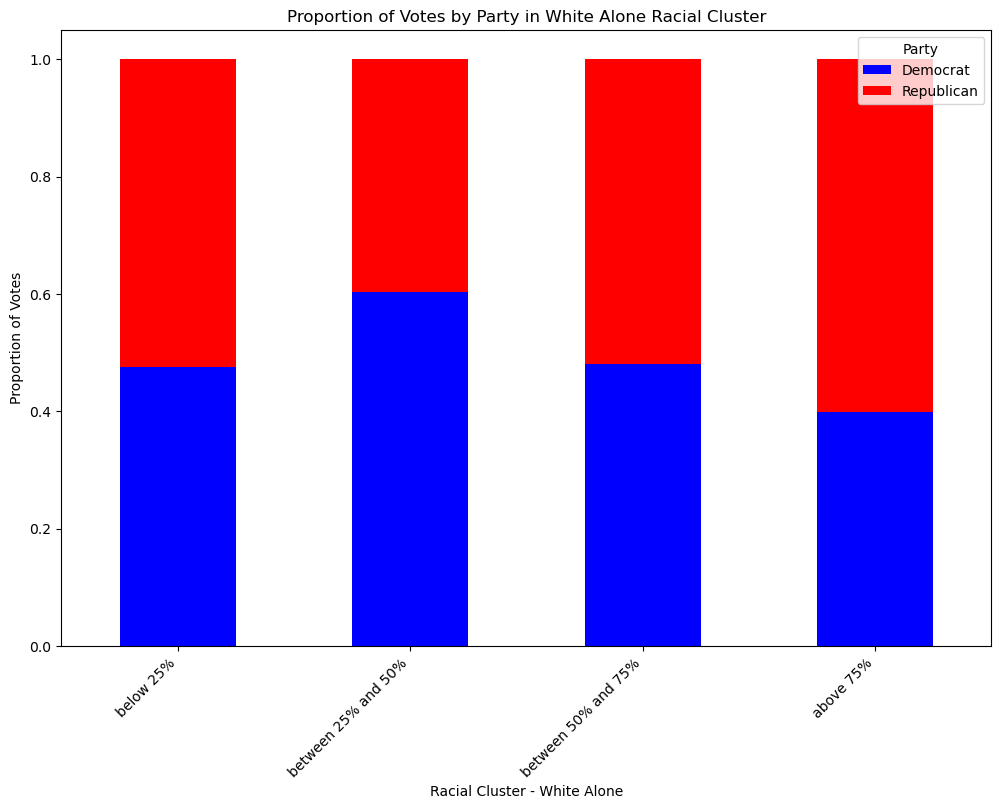

In [85]:
# Group the DataFrame
cluster_vote_counts = racial_data.groupby(['racial_cluster_White_alone', 'party'])['votes'].sum().reset_index()


# Calculate the total votes in each cluster
cluster_total_votes = cluster_vote_counts.groupby('racial_cluster_White_alone')['votes'].sum()

# Calculate the proportion of votes for each party in each cluster
cluster_vote_counts['proportion'] = cluster_vote_counts['votes'] / cluster_total_votes.loc[cluster_vote_counts['racial_cluster_White_alone']].values

# Pivot the DataFrame for better visualization
cluster_proportions = cluster_vote_counts.pivot(index='racial_cluster_White_alone', columns='party', values='proportion').reset_index()

# Plotting the bar plot
cluster_proportions.plot(x='racial_cluster_White_alone', kind='bar', stacked=True, color=['blue', 'red'], figsize=(12, 8))
plt.title('Proportion of Votes by Party in White Alone Racial Cluster')
plt.xlabel('Racial Cluster - White Alone')
plt.ylabel('Proportion of Votes')
plt.legend(title='Party', loc='upper right')
plt.xticks(rotation=45, ha='right');

Racial Cluster - White Alone without Hispanic or Latino

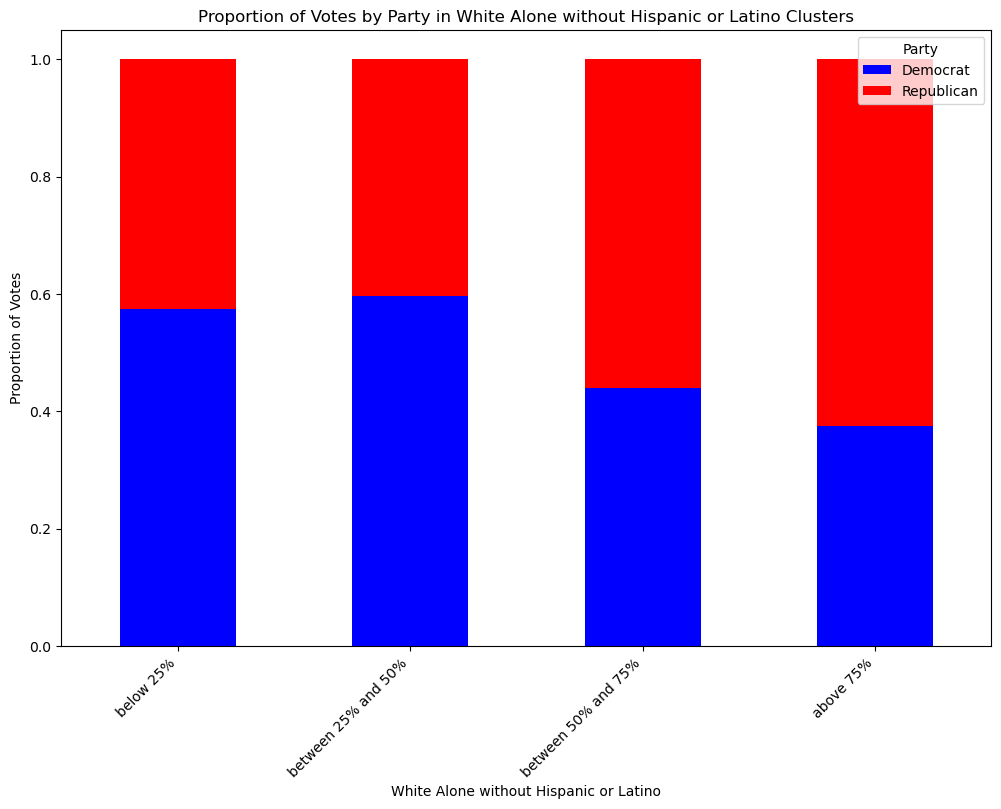

In [86]:
# Group the DataFrame
cluster_vote_counts = racial_data.groupby(['racial_cluster_White_alone_/H_L', 'party'])['votes'].sum().reset_index()

# Calculate the total votes in each cluster
cluster_total_votes = cluster_vote_counts.groupby('racial_cluster_White_alone_/H_L')['votes'].sum()

# Calculate the proportion of votes for each party in each cluster
cluster_vote_counts['proportion'] = cluster_vote_counts['votes'] / cluster_total_votes.loc[cluster_vote_counts['racial_cluster_White_alone_/H_L']].values

# Pivot the DataFrame for better visualization
cluster_proportions = cluster_vote_counts.pivot(index='racial_cluster_White_alone_/H_L', columns='party', values='proportion').reset_index()

# Plotting the bar plot
cluster_proportions.plot(x='racial_cluster_White_alone_/H_L', kind='bar', stacked=True, color=['blue', 'red'], figsize=(12, 8))
plt.title('Proportion of Votes by Party in White Alone without Hispanic or Latino Clusters')
plt.xlabel('White Alone without Hispanic or Latino')
plt.ylabel('Proportion of Votes')
plt.legend(title='Party', loc='upper right')
plt.xticks(rotation=45, ha='right');

#### Conclusion:

The clustering analysis of demographic data related to the percentage of White alone (RHI125214) and White alone, not Hispanic or Latino (RHI825214) within Democratic supporters reveals distinct voting patterns. For the racial cluster focusing on White alone, Democrats initially exhibit a balanced share of votes in the below 25% category, but their support increases in the 25-50% range. However, in the higher clusters (above 50%), the voting proportions return to a more evenly split scenario.

Conversely, in the racial cluster of White alone without Hispanic or Latino, Democrats demonstrate a substantial lead in the below 50% clusters, but their support diminishes in the higher clusters, allowing Republicans to dominate, particularly in the above 75% range.

#### 3.3.3.4. Education Levels Analysis

In this section, I look into the educational background of supporters by analyzing the percentage of individuals with different education levels. The focus will be on two key indicators: the percentage of high school graduates or higher (EDU635213) and the percentage of individuals with a Bachelor's degree or higher (EDU685213) among the demographic of Democratic voters.

Defining the dataframe

In [87]:
education_data = pd.merge(merged_supporters_by_county, merged_data[['state', 'county', 'EDU635213','EDU685213']], 
                                                           on=['state', 'county'], how='inner')

education_data = education_data.groupby(['county', 'party']).agg({
    'votes': 'sum',
    'total_votes' : 'first',
    'proportion': 'sum',
    'EDU635213': 'mean',
    'EDU685213': 'mean',}).reset_index()

education_data.head()

,county,party,votes,total_votes,proportion,EDU635213,EDU685213
0,Abbeville,Democrat,14504,5480,264.671533,76.8,12.2
1,Abbeville,Republican,29336,5480,535.328467,76.8,12.2
2,Acadia,Democrat,17694,6629,266.918087,72.1,10.2
3,Acadia,Republican,22080,6629,333.081913,72.1,10.2
4,Accomack,Democrat,17297,6750,256.251852,78.0,17.2


Correlation analysis

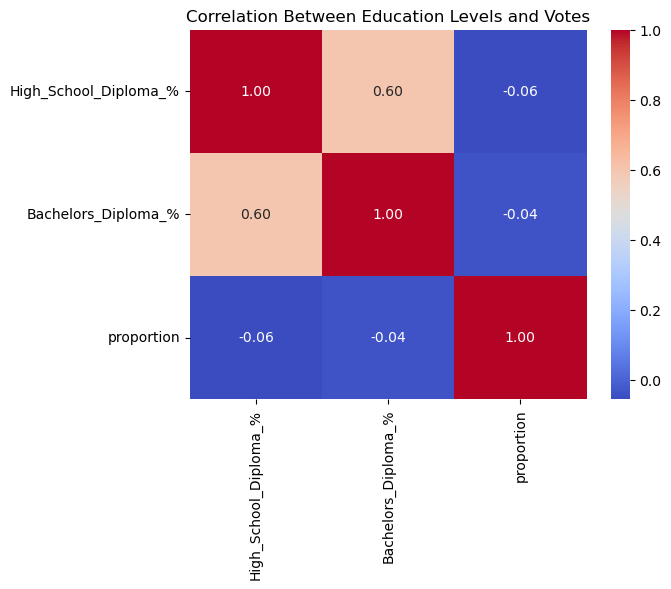

In [88]:
# Renaming the column for better clarity
education_data = education_data.rename(columns={
    'EDU635213': 'High_School_Diploma_%',
    'EDU685213': 'Bachelors_Diploma_%'})

# Calculate correlation matrix
correlation_matrix = education_data[['High_School_Diploma_%', 'Bachelors_Diploma_%', 'proportion']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Education Levels and Votes');

Define the bins for high school cluster

In [89]:
bins = [0, 65, 74, 84, 95]

# Define the labels for each cluster
labels = ['below 65%', 'between 65% and 75%', 'between 75% and 85%', 'above 95%']

# Add a new column 'high_school_cluster' to the DataFrame based on the clustering
education_data['high_school_cluster'] = pd.cut(education_data['High_School_Diploma_%'], bins=bins, labels=labels, right=False)

Define the bins for Bachelors cluster

In [90]:
# Define the bins for clustering
bins = [0, 10, 24, 49, 100]

# Define the labels for each cluster
labels = ['below 10%', 'between 10% and 25%', 'between 25% and 50%', 'above 50%']

# Add a new column 'bachelors_cluster' to the DataFrame based on the clustering
education_data['bachelors_cluster'] = pd.cut(education_data['Bachelors_Diploma_%'], bins=bins, labels=labels, right=False)

Illustrate high school cluster

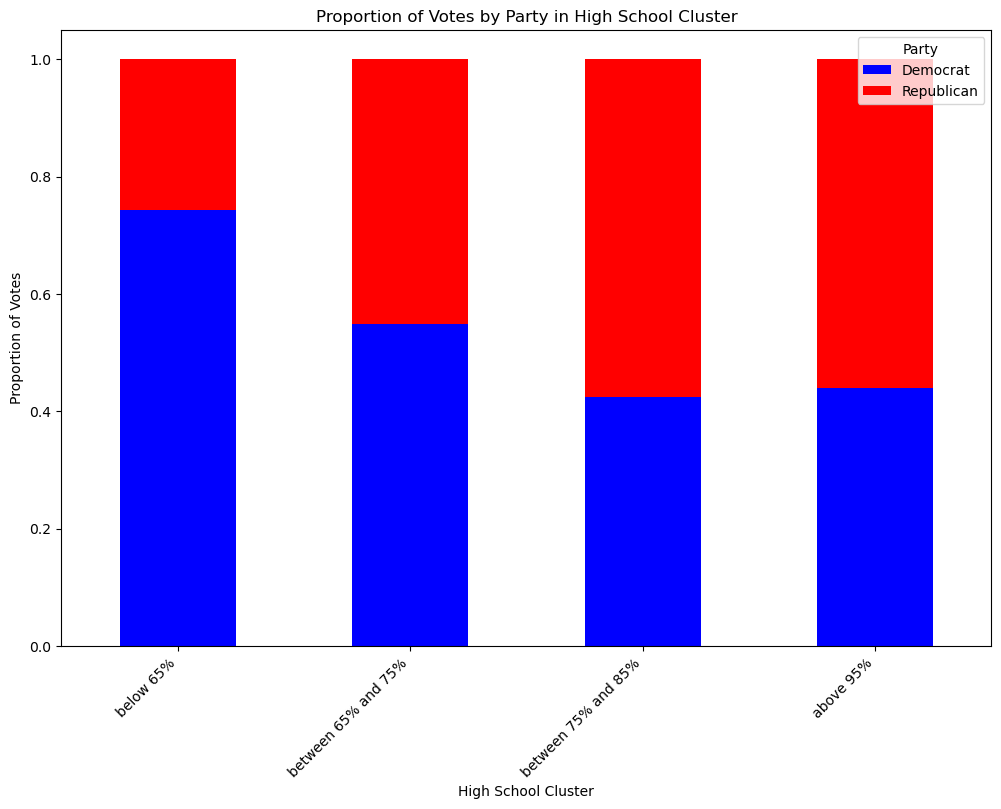

In [91]:
# Group the DataFrame
cluster_vote_counts = education_data.groupby(['high_school_cluster', 'party'])['votes'].sum().reset_index()

# Calculate the total votes in each cluster
cluster_total_votes = cluster_vote_counts.groupby('high_school_cluster')['votes'].sum()

# Calculate the proportion of votes for each party in each cluster
cluster_vote_counts['proportion'] = cluster_vote_counts['votes'] / cluster_total_votes.loc[cluster_vote_counts['high_school_cluster']].values

# Pivot the DataFrame for better visualization
cluster_proportions = cluster_vote_counts.pivot(index='high_school_cluster', columns='party', values='proportion').reset_index()

# Plotting the bar plot
cluster_proportions.plot(x='high_school_cluster', kind='bar', stacked=True, color=['blue', 'red'], figsize=(12, 8))
plt.title('Proportion of Votes by Party in High School Cluster')
plt.xlabel('High School Cluster')
plt.ylabel('Proportion of Votes')
plt.legend(title='Party', loc='upper right')
plt.xticks(rotation=45, ha='right');

Illustrate Bachelors cluster

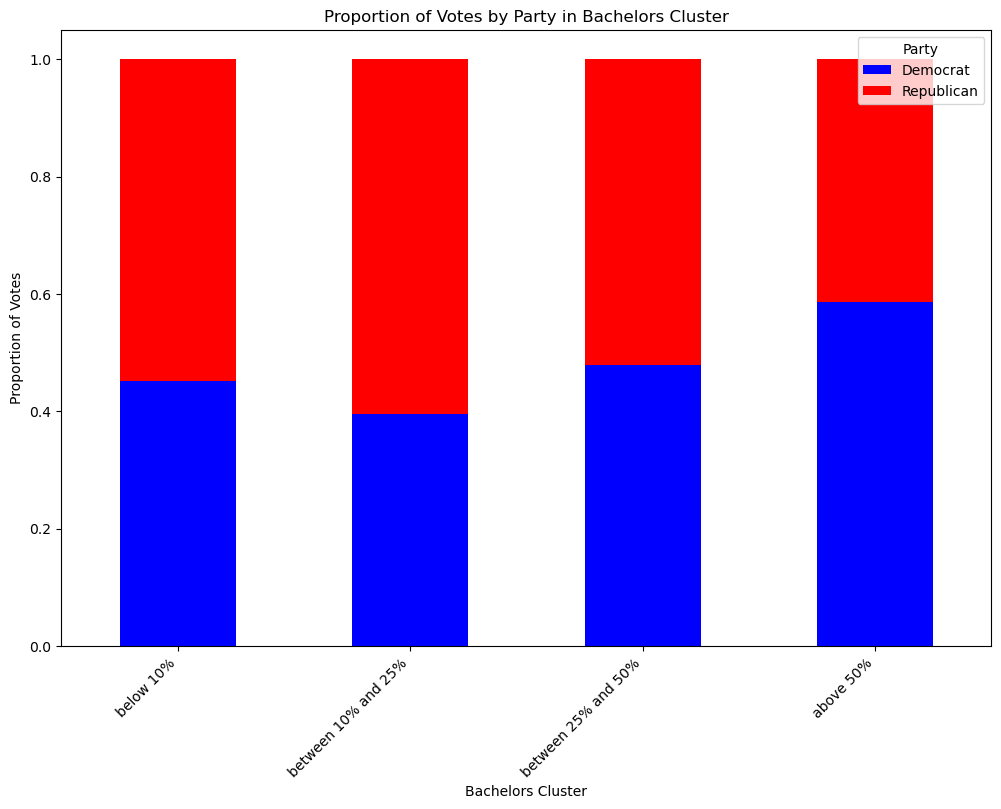

In [92]:
# Group the DataFrame
cluster_vote_counts = education_data.groupby(['bachelors_cluster', 'party'])['votes'].sum().reset_index()

# Calculate the total votes in each cluster
cluster_total_votes = cluster_vote_counts.groupby('bachelors_cluster')['votes'].sum()

# Calculate the proportion of votes for each party in each cluster
cluster_vote_counts['proportion'] = cluster_vote_counts['votes'] / cluster_total_votes.loc[cluster_vote_counts['bachelors_cluster']].values

# Pivot the DataFrame for better visualization
cluster_proportions = cluster_vote_counts.pivot(index='bachelors_cluster', columns='party', values='proportion').reset_index()

# Plotting the bar plot
cluster_proportions.plot(x='bachelors_cluster', kind='bar', stacked=True, color=['blue', 'red'], figsize=(12, 8))
plt.title('Proportion of Votes by Party in Bachelors Cluster')
plt.xlabel('Bachelors Cluster')
plt.ylabel('Proportion of Votes')
plt.legend(title='Party', loc='upper right')
plt.xticks(rotation=45, ha='right');

#### Conclusion

The analysis of education levels among the supporters reveals interesting patterns. In the high school education clusters, Republicans consistently gain more votes with higher educational attainment. Notably, in clusters where below 65% have a high school diploma, only around 25% of votes go to Republicans, while in clusters with above 95% high school diplomas, Republicans secure more than half of the votes.

On the other hand, the dynamics shift slightly in the Bachelor's degree or higher clusters. Republicans maintain a slight lead in nearly all categories, with a somewhat reduced margin in the 25-50% cluster. This suggests nuanced variations in voting patterns based on educational levels within the Democratic support base.

#### 3.3.3.4. Income brackets Analysis

In this section, I explore the correlation between income brackets and voters support.

Defining the dataframe

In [93]:
income_data = pd.merge(merged_supporters_by_county, merged_data[['state', 'county', 'INC910213']], 
                                                           on=['state', 'county'], how='inner')

income_data = income_data.groupby(['county', 'party']).agg({
    'votes': 'sum',
    'total_votes' : 'first',
    'proportion': 'sum',
    'INC910213': 'mean',}).reset_index()

income_data.head()

,county,party,votes,total_votes,proportion,INC910213
0,Abbeville,Democrat,14504,5480,264.671533,18134.0
1,Abbeville,Republican,29336,5480,535.328467,18134.0
2,Acadia,Democrat,17694,6629,266.918087,19910.0
3,Acadia,Republican,22080,6629,333.081913,19910.0
4,Accomack,Democrat,17297,6750,256.251852,22703.0


Defining the bins for income clustering

In [94]:
bins = [0, 20000, 34999, 44999, 62498]

# Define the labels for each income per capita cluster
labels = ['below 20000', 'between 20000 and 35000', 'between 35000 and 45000', 'above 50000']

# Add a new column 'income_cluster' to the DataFrame based on the clustering
income_data['income_cluster'] = pd.cut(income_data['INC910213'], bins=bins, labels=labels, right=False)

Illustrating Income cluster

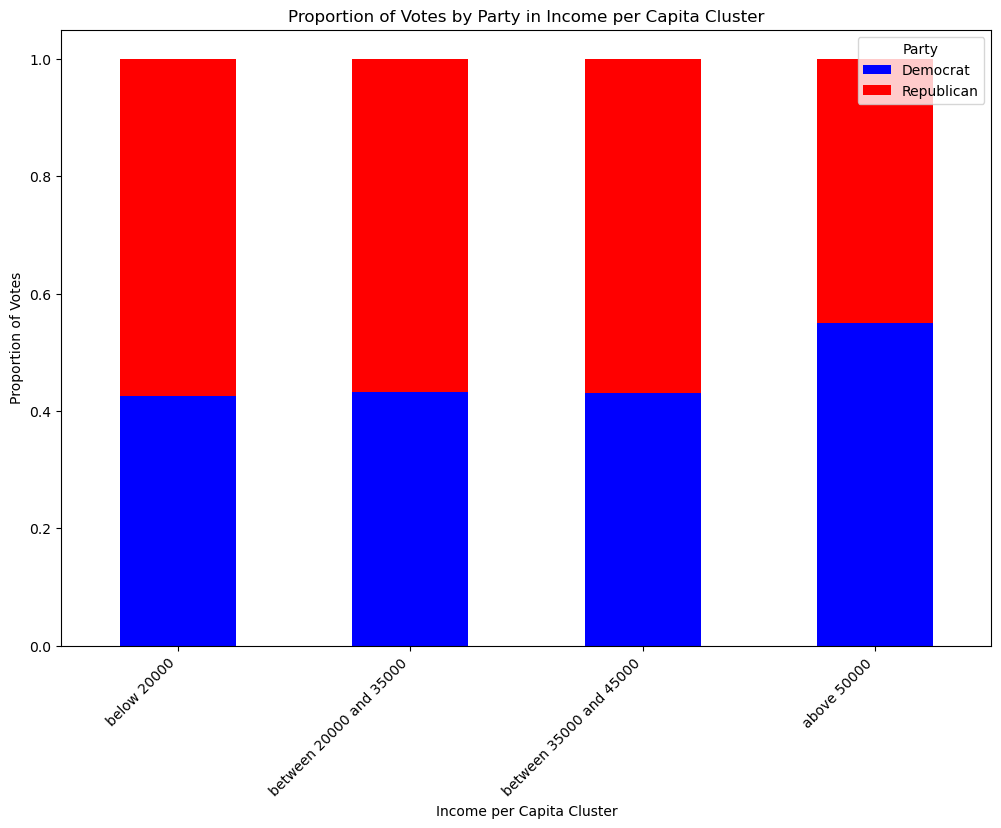

In [95]:
# Group the DataFrame 
cluster_vote_counts = income_data.groupby(['income_cluster', 'party'])['votes'].sum().reset_index()

# Calculate the total votes in each cluster
cluster_total_votes = cluster_vote_counts.groupby('income_cluster')['votes'].sum()

# Calculate the proportion of votes for each party in each cluster
cluster_vote_counts['proportion'] = cluster_vote_counts['votes'] / cluster_total_votes.loc[cluster_vote_counts['income_cluster']].values

# Pivot the DataFrame for better visualization
cluster_proportions = cluster_vote_counts.pivot(index='income_cluster', columns='party', values='proportion').reset_index()

# Plotting the bar plot
cluster_proportions.plot(x='income_cluster', kind='bar', stacked=True, color=['blue', 'red'], figsize=(12, 8))
plt.title('Proportion of Votes by Party in Income per Capita Cluster')
plt.xlabel('Income per Capita Cluster')
plt.ylabel('Proportion of Votes')
plt.legend(title='Party', loc='upper right')
plt.xticks(rotation=45, ha='right');

In [96]:
# Extract the proportions for each party in each cluster
proportions_democrat = cluster_proportions['Democrat']
proportions_republican = cluster_proportions['Republican']

# Perform ANOVA
f_statistic, p_value = f_oneway(proportions_democrat, proportions_republican)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

F-statistic: 3.583083901141122
P-value: 0.10721960411203642
Fail to reject the null hypothesis.


#### Result:

While the income cluster visualization implies a general trend of increased Democratic support with higher income, the ANOVA results suggest no statistically significant difference in voting proportions between Democrats and Republicans across income clusters. 

To delve deeper into the nuanced patterns, a t-SNE analysis is conducted to explore the complex relationships within the income demographic data among Democratic supporters. 

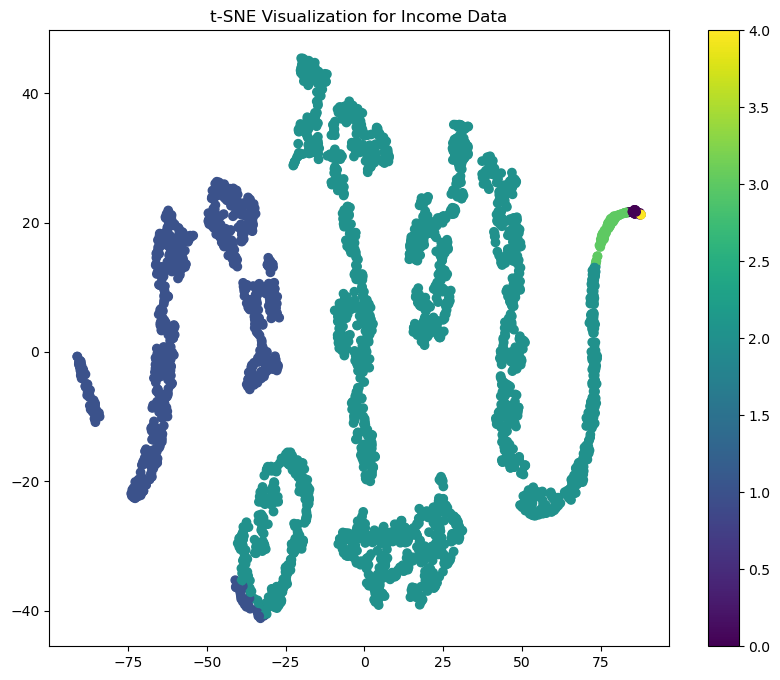

In [97]:
# Specifying and selecting columns for t-SNE
selected_columns = ['INC910213', 'proportion']
selected_data = income_data[selected_columns]

# Converting categorical data to numerical values
label_encoder = LabelEncoder()
income_data['income_cluster_numeric'] = label_encoder.fit_transform(income_data['income_cluster'])

# Initializing t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fitting and transforming the data
tsne_result = tsne.fit_transform(selected_data)

# Creating a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['tsne1', 'tsne2'])

# Concatenate the t-SNE results with the original data (if needed)
tsne_combined = pd.concat([income_data, tsne_df], axis=1)

# Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_combined['tsne1'], tsne_combined['tsne2'], c=tsne_combined['income_cluster_numeric'], cmap='viridis')
plt.title('t-SNE Visualization for Income Data')
plt.colorbar();

#### Result:

The t-SNE visualization reveals distinct clusters with varying darkness levels, suggesting different patterns within the Democratic supporter demographic data. The spatial distribution, gradient of color intensity, and non-linear paths in the t-SNE space indicate complex relationships and non-linear structures among the features. While the ANOVA results did not show significant differences, the t-SNE analysis provides a nuanced understanding of the intricate interplay between income levels and political preferences within the Democratic support base.


#### Conclusion:

Overall, the income clusters display a general trend of increasing Democratic support with higher income, although the non-linear nature of the relationships highlights the need for a more nuanced exploration of these dynamics.

# 📌Final Conclusions

The comprehensive analysis of the dataset has uncovered valuable insights across multiple dimensions:

### 1. Trump Analysis
- Trump secures the highest overall vote share at 44% within the Republican party.
- Washington emerges with the most support for Trump in county-level analysis.
- Republicans exhibit highest support in states like Washington, Idaho, Nevada, Nebraska, and Utah.
- Megative correlation with young individuals, positive correlation with those aged 65 and over.
- Moderate negative correlation with the percentage of female persons.

### 2. Democrats Overview
- Hillary Clinton is the lead candidate with over 58% of votes.
- Democrats enjoy strong support in Colorado, Hawaii, New Mexico, New York, and New Jersey.

### 3. Democrats and Republicans Comparison

- **Housing** clusters impact party support, with Republicans dominating in 'above 75%' cluster.
- **Age** clusters, especially individuals aged 65 and over, show higher Republican support.
- Subtle positive correlation between **female** population and Democratic support.
- **Racial** clustering analysis reveals that Democrats show balanced support in White alone clusters but lose ground in higher clusters.
- Republicans gain more votes with higher **educational** attainment in high school education clusters. Nuanced variations in voting patterns based on educational levels within the Democratic support base.
- General trend of increased Democratic support with higher **income**.

### Limitations 🔒
The analysis's reliability hinges on the assumption that the dataset is representative of the broader population. Additionally, certain variables and external factors not included in the dataset may influence the observed patterns.

### Recommendations for Future Analysis 📑

- In-depth Exploration of Democrats:
  - Further investigate the dynamics within the Democratic party, particularly focusing on Hillary Clinton's supporters for a more detailed understanding.
  
- Swing State Analysis:
  - Conduct a thorough examination of swing states, differentiating between red, blue, and swing states. Identify which party has more potential to secure victories in swing states, considering demographic and regional factors.
  
- Deepened t-SNE Analysis:
  - Extend the t-SNE analysis to uncover additional clusters and relationships within the data, providing a more comprehensive understanding of complex patterns.

# ‼️Recommendations for Democrats: Strategic Focus Areas

### Geographic Focus:
1. **Colorado:** Given its strong Democratic support, allocating resources to solidify and expand the party's base in Colorado is strategic.
  
2. **Hawaii and New Mexico:** These states exhibit notable Democratic support and present opportunities for further engagement and outreach.

### Target Voter Demographics:
1. **Younger Demographics:** Concentrate efforts on mobilizing and energizing younger demographics, particularly those between the ages of 18 and 30, who have shown a propensity for Democratic support.

2. **Education and Income Strategies:** Tailor messaging and policies to resonate with voters in areas with high educational attainment and moderate income levels. Implementing targeted outreach in these clusters may yield favorable results.

3. **Urban Areas:** Focus on urban centers, where Democratic support tends to be stronger. Strengthening ties and engagement within these communities can significantly impact overall electoral outcomes.

4. **Gender-Inclusive Strategies:** Acknowledge the subtle positive correlation between the percentage of female individuals and Democratic support. Develop and communicate policies that resonate with women voters, emphasizing inclusivity and addressing gender-specific concerns. Engage in dialogue with women-led organizations and influencers to amplify support within this demographic.

5. **Racial Diversity Engagement:** Understand the nuances revealed by racial clustering analysis, ensuring a balanced approach in White alone clusters while addressing challenges in higher clusters. Develop outreach strategies tailored to specific racial demographics, acknowledging their unique concerns and aspirations. Promote diversity and inclusion within the party, showcasing a commitment to representing and advocating for all racial groups.

6. **Income-Based Initiatives:** Recognize the general trend of increased Democratic support with higher income. Craft economic policies that resonate with individuals across income brackets, emphasizing inclusivity and equitable wealth distribution. 